# Exploring the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [2]:
data = pd.read_csv("final_processed_data.csv")
data

OCC_CODE  YEAR    TOT_EMP  EMP_PRSE  PCT_TOTAL        A_MEAN  MEAN_PRSE  \
0           0  2005  130307850  0.285942    2000.00  37872.943028   0.350404   
1           0  2006  132604990  0.297540    2000.00  39186.516022   0.340880   
2           0  2007  134354280  0.278407    2000.00  40686.510160   0.310777   
3           0  2008  135185250  0.269252    2000.00  42266.990860   0.301856   
4           0  2009  130647600  0.280232    2000.00  43465.316310   0.321103   
..        ...   ...        ...       ...        ...           ...        ...   
432        53  2019   49890680  1.608688     737.83  37927.262611   0.627057   
433        53  2020   48442920  1.689445     736.78  39682.741808   0.623255   
434        53  2021   50209220  1.254669     743.77  41275.193554   0.454687   
435        53  2022   53967940  1.172618     756.15  43820.977840   0.550944   
436        53  2023   54915470  1.126174     768.78  46685.458943   0.405176   

          A_PCT25      A_MEDIAN       A_PCT75      CPI  PRICE_INDEX  \
0    21901.665952  30775.050019  45537.519399  193.600        107.9   
1    22637.026038  31801.423907  47143.153093  201.300        117.2   
2    23469.186031  32929.952371  48904.859511  206.755        118.6   
3    24312.354383  34067.877426  50781.510492  215.208        141.2   
4    24856.120791  34955.809928  52114.996626  213.022        116.8   
..            ...           ...           ...      ...          ...   
432  28143.488920  35035.678706  44667.325703  255.296        127.0   
433  29717.554848  36872.883829  46429.707173  255.848        119.0   
434  31873.959992  39059.827514  47765.587954  268.452        132.8   
435  34378.297537  40846.272556  49865.047417  291.359        148.2   
436  36895.973284  43770.456545  52522.311879  303.365        139.7   

     UNEMPLOYMENT_RATE  SP_INDEX  
0                  5.1   1178.28  
1                  4.6   1290.01  
2                  4.4   1511.14  
3                  5.4   1403.22  
4                  9.4    902.41  
..                 ...       ...  
432                3.6   2854.71  
433               13.2   2919.62  
434                5.8   4167.85  
435                3.6   4040.36  
436                3.7   4146.17  

[437 rows x 14 columns]

In [3]:
EndYear = 2021

timeseries_data = {OCC_CODE: group_df for OCC_CODE, group_df in data.groupby("OCC_CODE")[['YEAR','TOT_EMP']]}
grouped_data = {}

for occ_code in timeseries_data:
    grouped_data[occ_code] = timeseries_data[occ_code].copy().set_index("YEAR")

for occ_code in timeseries_data:
    timeseries_data[occ_code] = timeseries_data[occ_code].copy().set_index("YEAR")

for occ_code in grouped_data:
        group_df = grouped_data[occ_code]
        group_df = np.log(group_df)
        grouped_data[occ_code] = {
            "train": group_df[group_df.index <= EndYear],
            "test": group_df[group_df.index > EndYear]
        }

for occ_code in timeseries_data:
        group_df = timeseries_data[occ_code]
        group_df = np.log(group_df)
        timeseries_data[occ_code] = {
            "train": group_df[group_df.index <= EndYear],
            "test": group_df[group_df.index > EndYear]
        }

# Convert the dictionary values into a list of dataframes
dataframes_list = list(grouped_data.values())

# Access individual datasets
for occ_code, group_df in grouped_data.items():
    print(f"Dataset for OCC_CODE {occ_code}:")
    print(group_df)

Dataset for OCC_CODE 0:
{'train':         TOT_EMP
YEAR           
2005  18.685410
2006  18.702885
2007  18.715991
2008  18.722157
2009  18.688014
2010  18.660463
2011  18.669715
2012  18.685256
2013  18.702763
2014  18.721735
2015  18.742015
2016  18.760006
2017  18.775198
2018  18.790403
2019  18.805096
2020  18.750701
2021  18.763464, 'test':         TOT_EMP
YEAR           
2022  18.811952
2023  18.838429}
Dataset for OCC_CODE 11:
{'train':         TOT_EMP
YEAR           
2005  16.293598
2006  16.282087
2007  16.300740
2008  16.278486
2009  16.318896
2010  16.302992
2011  16.330325
2012  17.056392
2013  17.079970
2014  17.109872
2015  17.138474
2016  17.160434
2017  17.186454
2018  17.231380
2019  17.271586
2020  17.258826
2021  17.380041, 'test':         TOT_EMP
YEAR           
2022  17.487237
2023  17.552290}
Dataset for OCC_CODE 13:
{'train':         TOT_EMP
YEAR           
2005  16.195999
2006  16.270462
2007  16.302765
2008  16.322463
2009  16.308653
2010  16.315284
2011  16.328

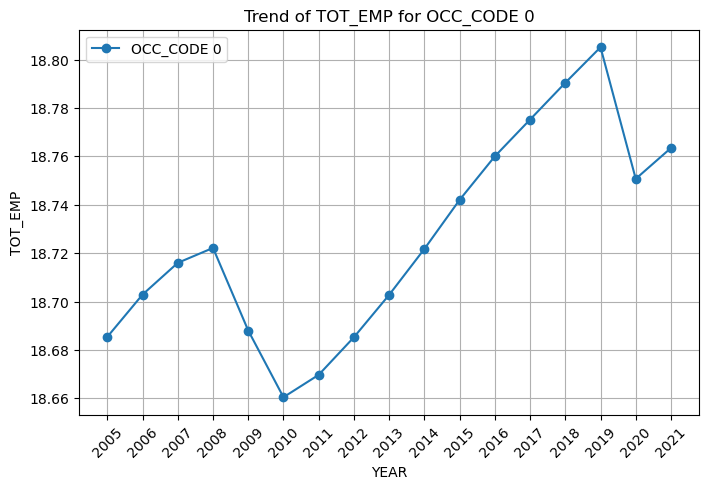

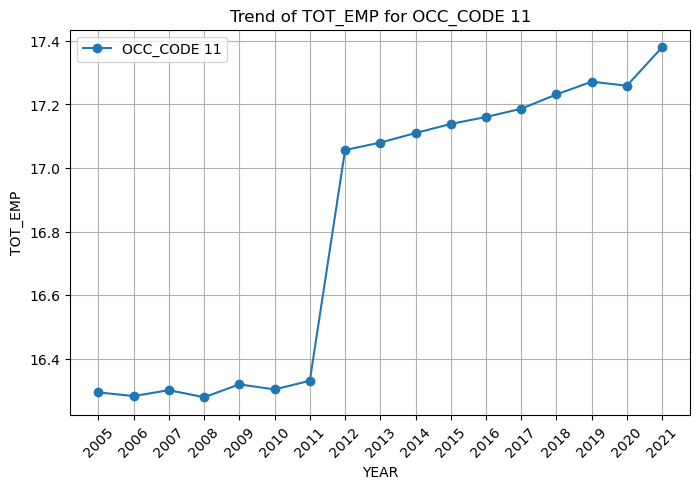

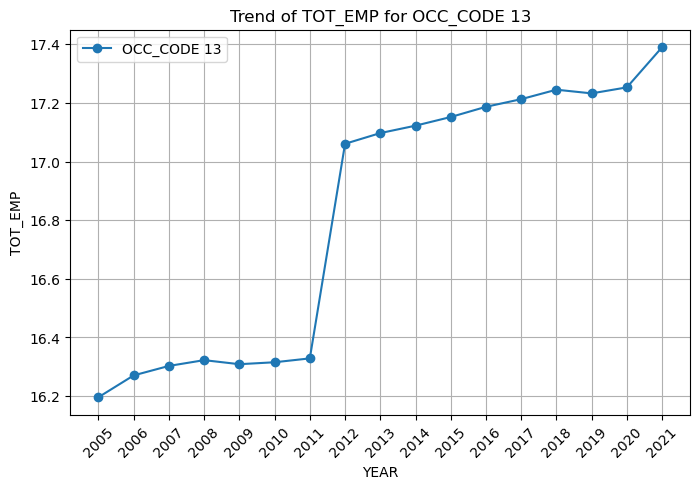

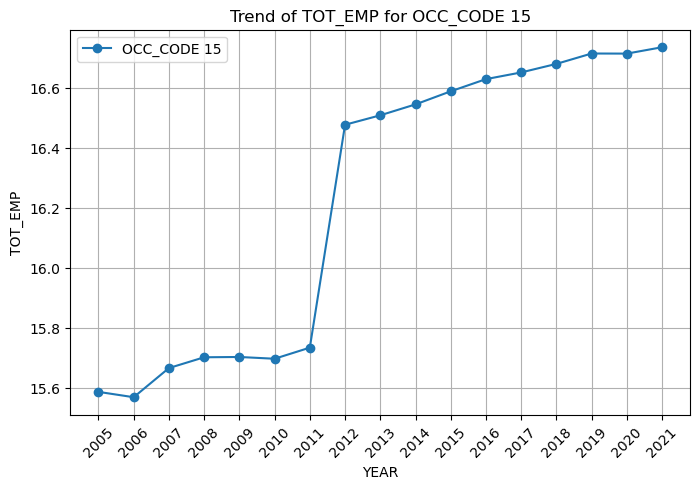

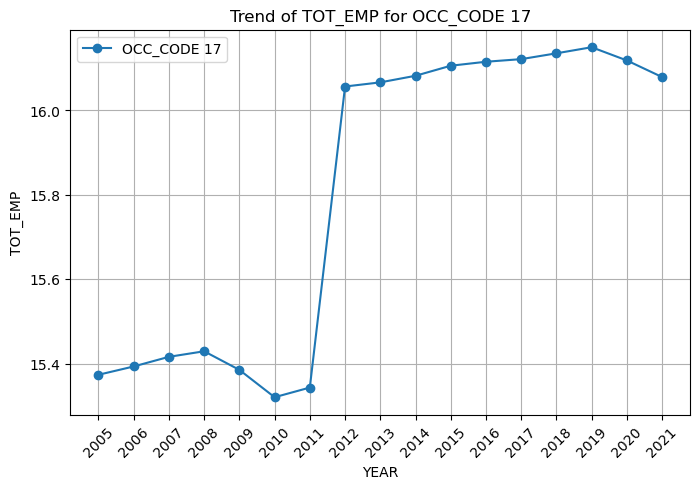

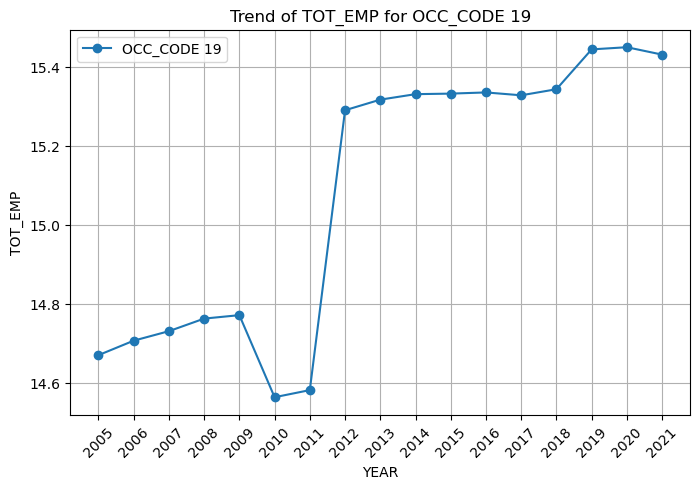

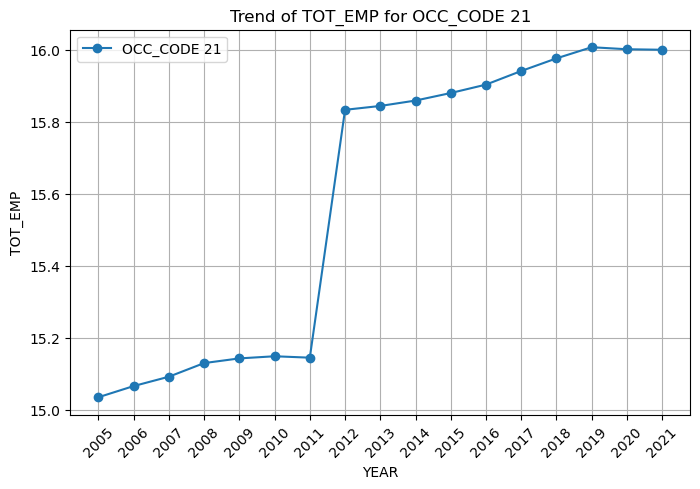

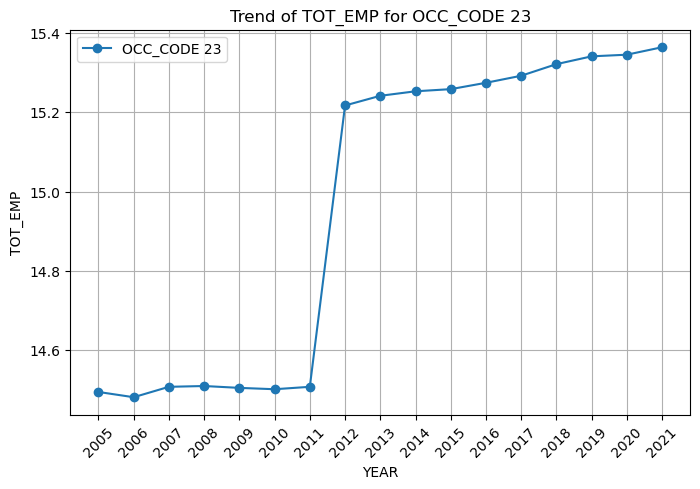

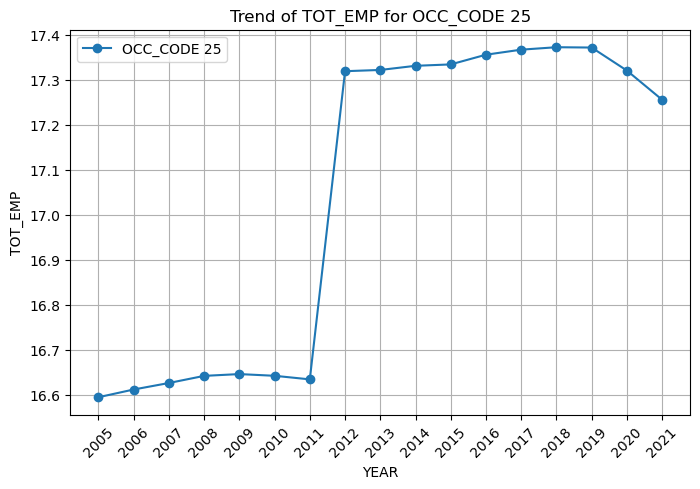

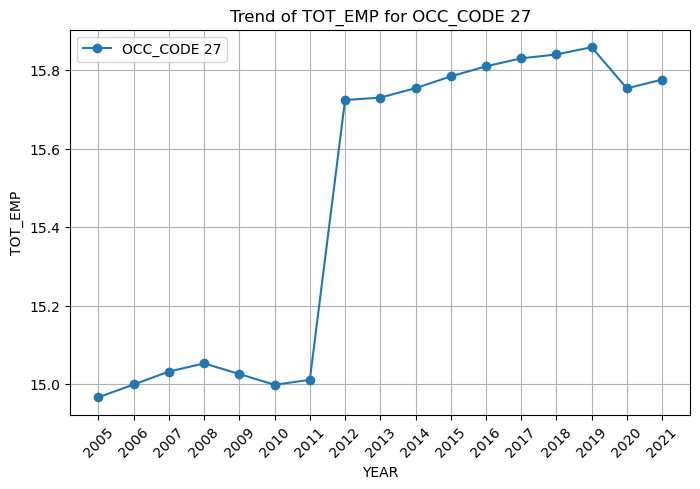

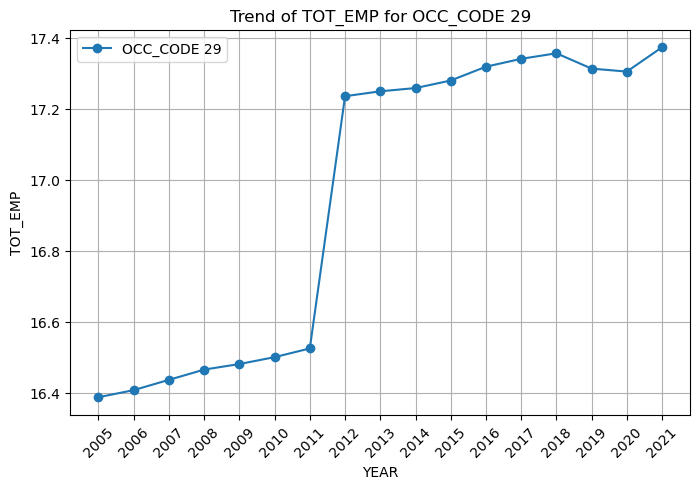

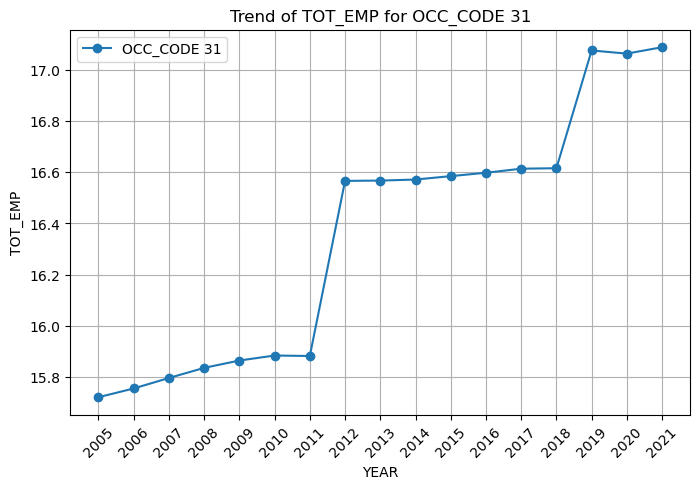

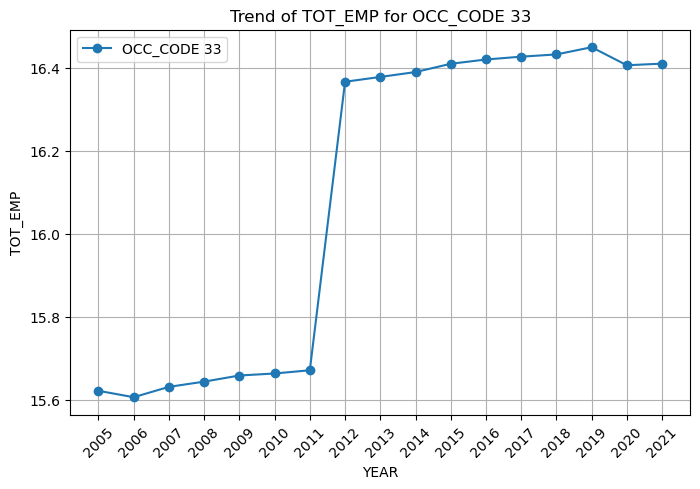

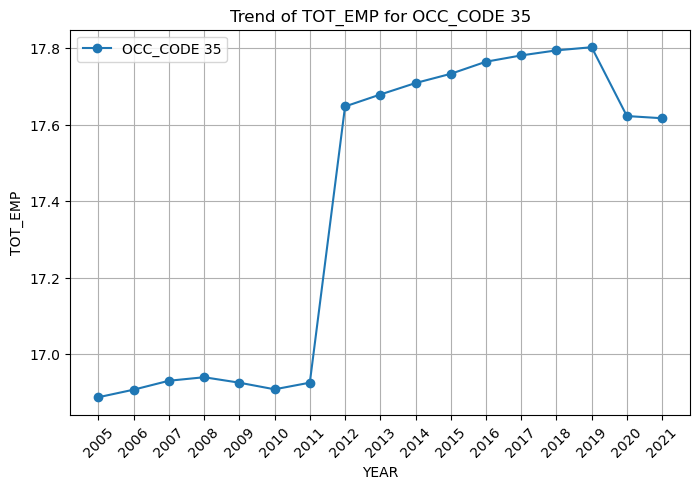

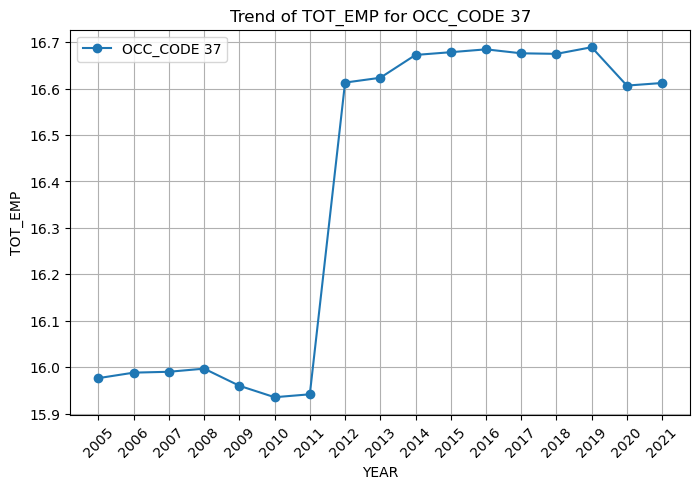

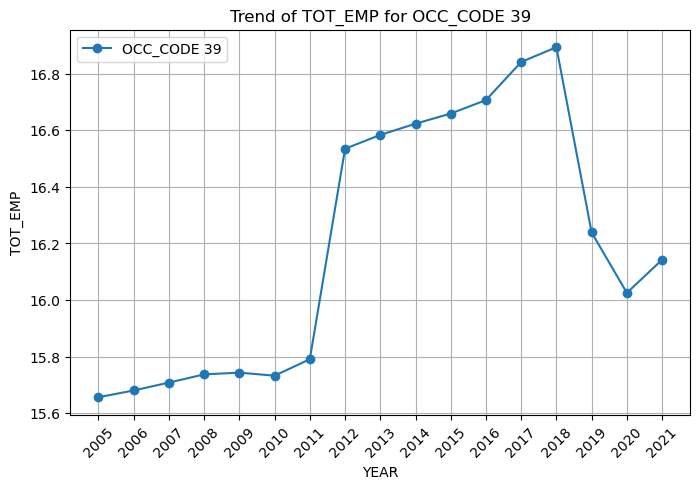

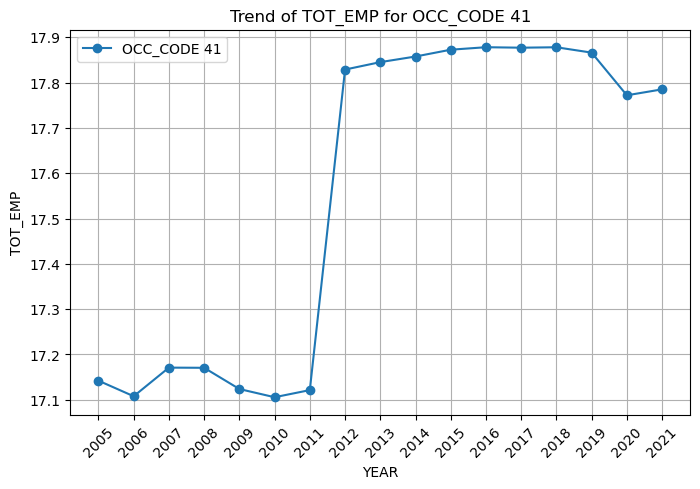

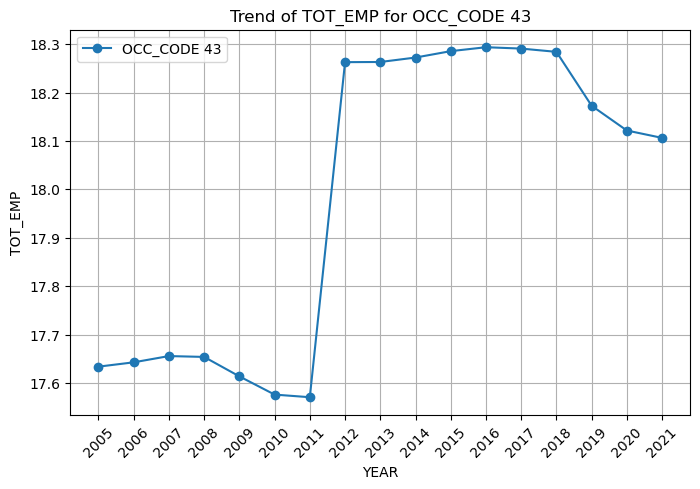

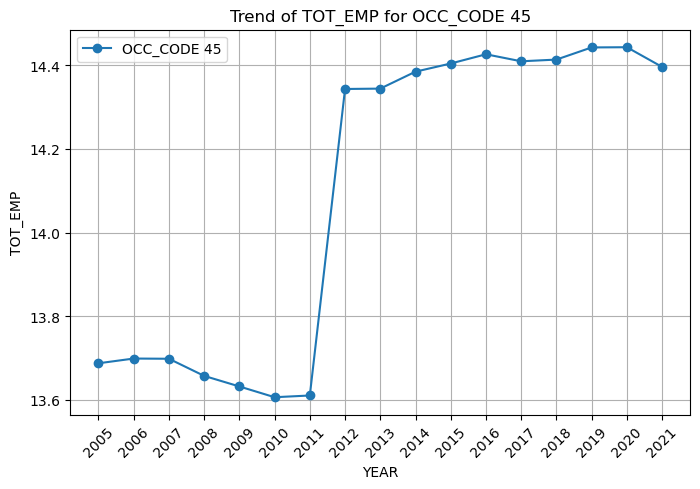

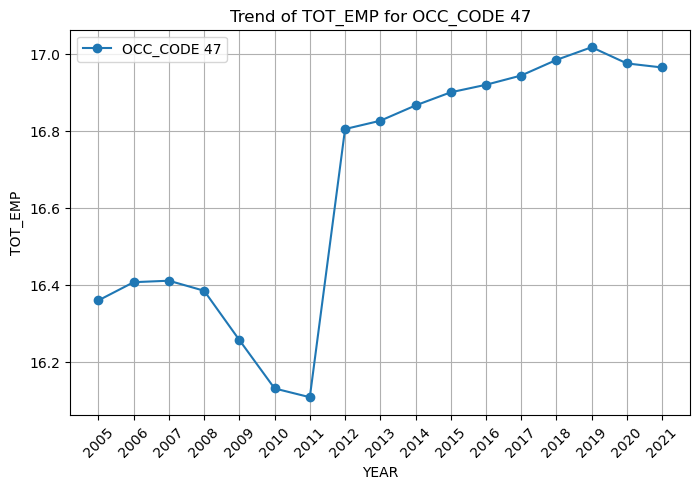

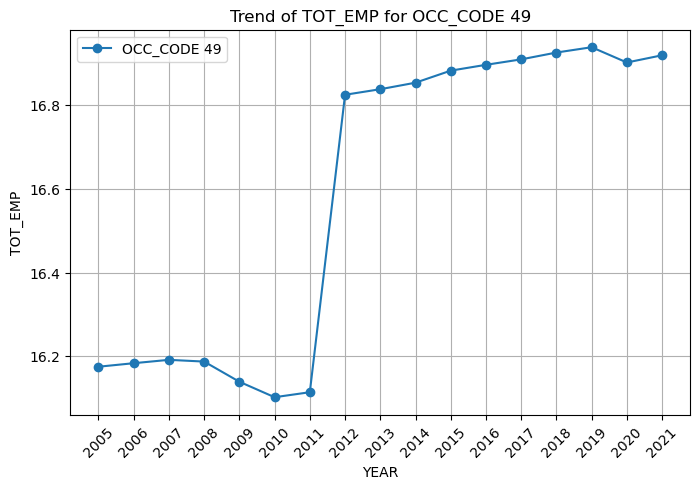

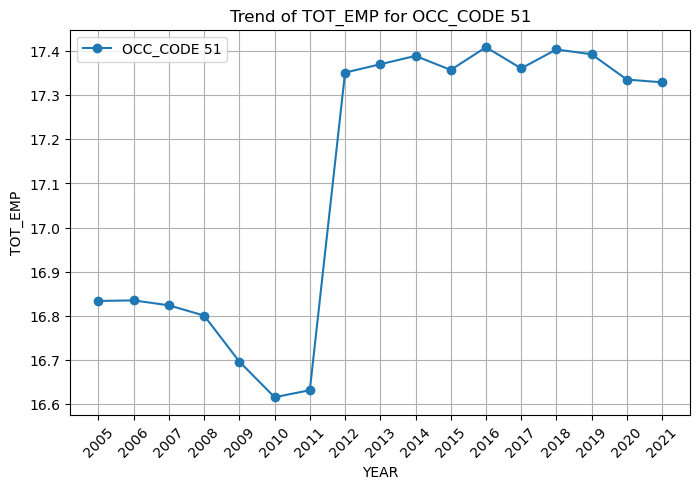

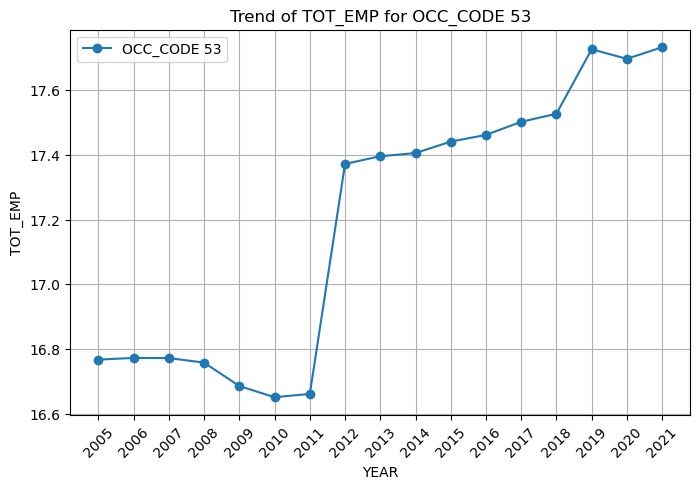

In [4]:
for occ_code, group_df in grouped_data.items():
    df = group_df["train"]
    # Plot each dataframe
    plt.figure(figsize=(8, 5))  # Set figure size
    plt.plot(df.index, df["TOT_EMP"], marker='o', linestyle='-', label=f'OCC_CODE {occ_code}')
    #plt.plot(group_df.index, group_df["UNEMPLOYMENT_RATE"], marker='o', linestyle='-', label=f'OCC_CODE {occ_code}')
    plt.title(f'Trend of TOT_EMP for OCC_CODE {occ_code}')
    plt.xlabel('YEAR')
    plt.ylabel('TOT_EMP')
    plt.xticks(df.index, rotation=45)
    plt.grid(True)  # Add grid for better readability
    plt.legend()
    plt.show()

# Check Stationarity

In [5]:
def check_stationarity(series):
    result = adfuller(series)
    return result[1]

In [6]:
for occ_code, group_df in grouped_data.items():
    df = group_df["train"]
    print(f'Stationarity for OCC_CODE {occ_code}: {check_stationarity(df)}')

Stationarity for OCC_CODE 0: 0.7379557487062995
Stationarity for OCC_CODE 11: 2.929051164322772e-15
Stationarity for OCC_CODE 13: 0.7893596345991296
Stationarity for OCC_CODE 15: 0.0
Stationarity for OCC_CODE 17: 0.7043559700371345
Stationarity for OCC_CODE 19: 0.0
Stationarity for OCC_CODE 21: 0.0
Stationarity for OCC_CODE 23: 0.0
Stationarity for OCC_CODE 25: 0.6390378639671039
Stationarity for OCC_CODE 27: 0.6793680249271781
Stationarity for OCC_CODE 29: 0.6695411929062741
Stationarity for OCC_CODE 31: 2.188834281502205e-30
Stationarity for OCC_CODE 33: 0.6678774405708936
Stationarity for OCC_CODE 35: 0.6580058885170539
Stationarity for OCC_CODE 37: 0.6849180981844378
Stationarity for OCC_CODE 39: 2.2389939312762207e-23
Stationarity for OCC_CODE 41: 0.6720225100726845
Stationarity for OCC_CODE 43: 0.0
Stationarity for OCC_CODE 45: 0.7130450556502522
Stationarity for OCC_CODE 47: 0.8016066612718049
Stationarity for OCC_CODE 49: 0.6761598677354699
Stationarity for OCC_CODE 51: 0.67181

# Differencing

In [7]:
for occ_code, group_df in grouped_data.items():
    # Diff the data set
    grouped_data[occ_code]["train"] = grouped_data[occ_code]["train"].diff().dropna()
    print(group_df["train"])

       TOT_EMP
YEAR          
2006  0.017475
2007  0.013105
2008  0.006166
2009 -0.034142
2010 -0.027552
2011  0.009252
2012  0.015541
2013  0.017508
2014  0.018972
2015  0.020280
2016  0.017991
2017  0.015192
2018  0.015205
2019  0.014693
2020 -0.054395
2021  0.012763
       TOT_EMP
YEAR          
2006 -0.011511
2007  0.018654
2008 -0.022255
2009  0.040410
2010 -0.015904
2011  0.027333
2012  0.726067
2013  0.023577
2014  0.029902
2015  0.028602
2016  0.021961
2017  0.026020
2018  0.044926
2019  0.040205
2020 -0.012760
2021  0.121215
       TOT_EMP
YEAR          
2006  0.074463
2007  0.032303
2008  0.019698
2009 -0.013810
2010  0.006630
2011  0.013198
2012  0.732156
2013  0.036532
2014  0.025266
2015  0.029535
2016  0.034821
2017  0.026060
2018  0.032324
2019 -0.012561
2020  0.020487
2021  0.136998
       TOT_EMP
YEAR          
2006 -0.017795
2007  0.097055
2008  0.035926
2009  0.000985
2010 -0.005882
2011  0.036960
2012  0.741994
2013  0.031492
2014  0.036333
2015  0.043529
2016  0.04

In [8]:
for occ_code, group_df in grouped_data.items():
    df = group_df["train"]
    print(f'Stationarity for OCC_CODE {occ_code}: {check_stationarity(df)}')

Stationarity for OCC_CODE 0: 0.028932446070987553
Stationarity for OCC_CODE 11: 0.0022114721677655253
Stationarity for OCC_CODE 13: 0.002439600811092407
Stationarity for OCC_CODE 15: 2.1118629406661195e-07
Stationarity for OCC_CODE 17: 2.9583218845404776e-28
Stationarity for OCC_CODE 19: 0.0048798957575452
Stationarity for OCC_CODE 21: 0.0
Stationarity for OCC_CODE 23: 1.0454051790643165e-17
Stationarity for OCC_CODE 25: 1.3142872184374081e-08
Stationarity for OCC_CODE 27: 0.002756229018868889
Stationarity for OCC_CODE 29: 0.0025315550919469475
Stationarity for OCC_CODE 31: 0.3117963641844925
Stationarity for OCC_CODE 33: 0.0024068247853195304
Stationarity for OCC_CODE 35: 0.0062887115483458095
Stationarity for OCC_CODE 37: 0.12822880757518984
Stationarity for OCC_CODE 39: 0.4101692894736495
Stationarity for OCC_CODE 41: 0.004456780063141652
Stationarity for OCC_CODE 43: 0.0006169445727937781
Stationarity for OCC_CODE 45: 0.30670275707449496
Stationarity for OCC_CODE 47: 0.893286198269

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


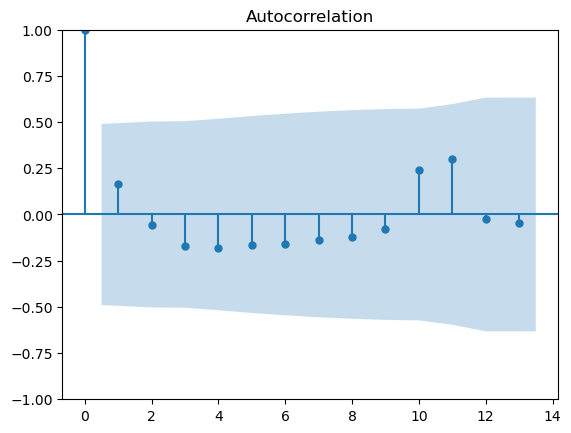

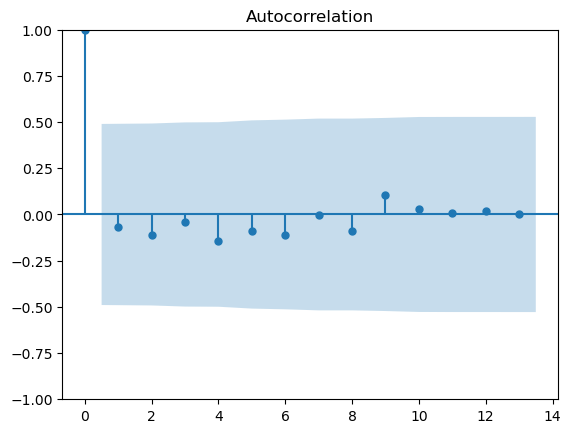

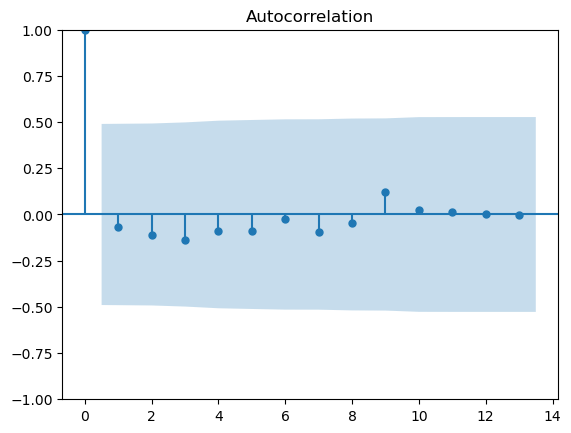

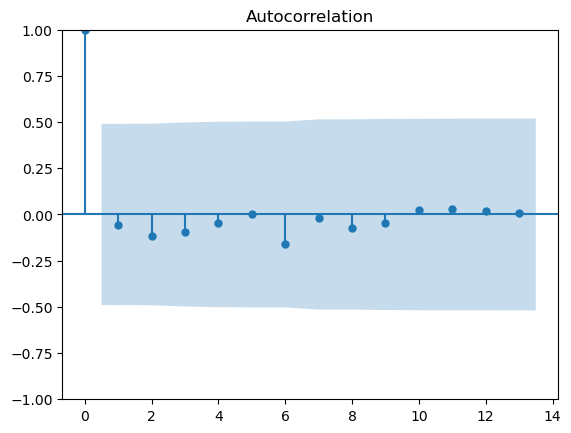

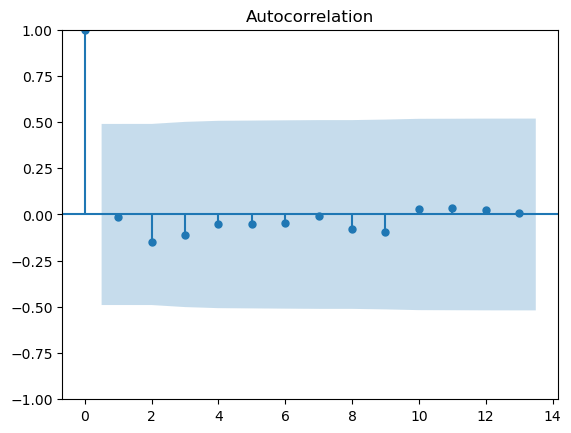

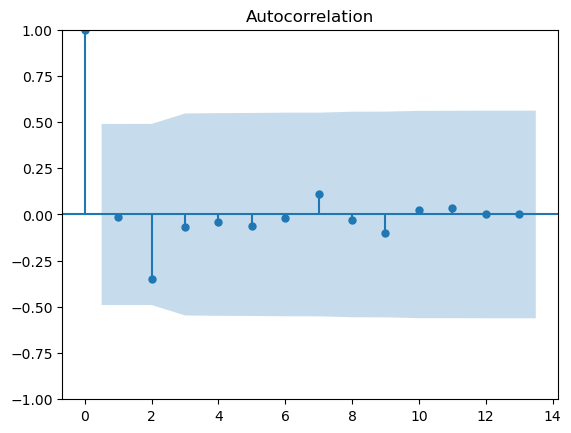

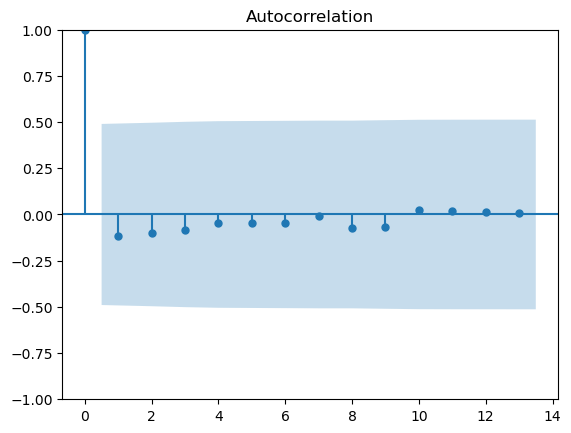

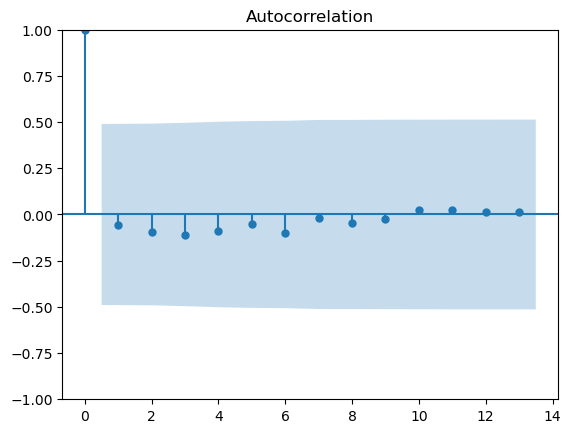

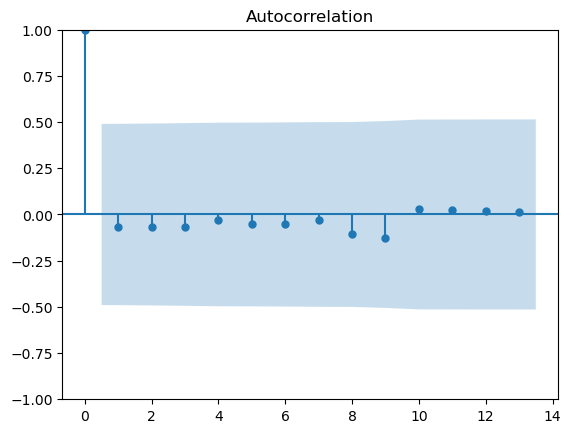

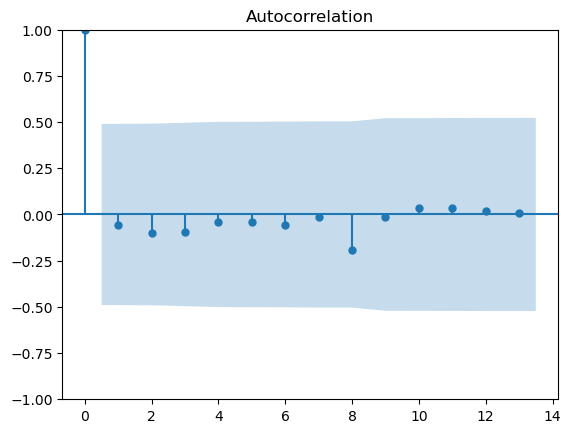

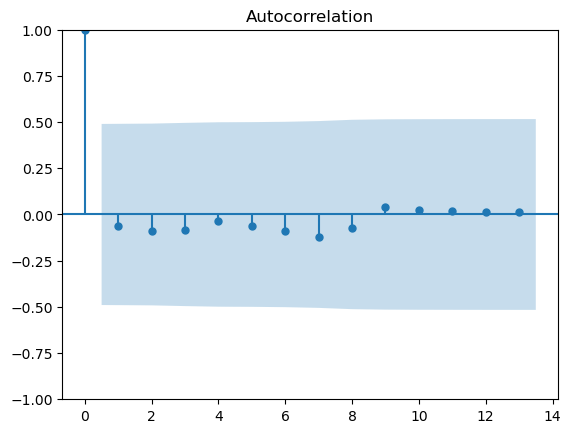

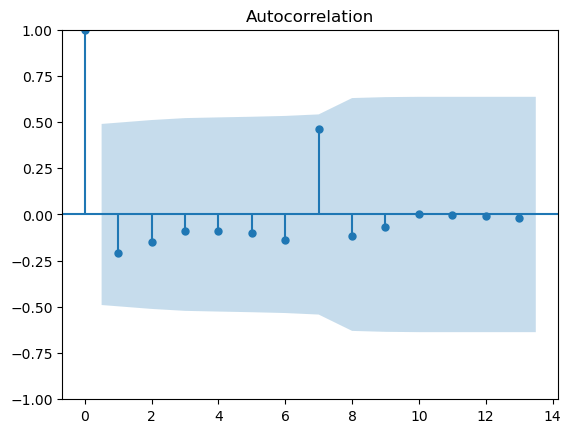

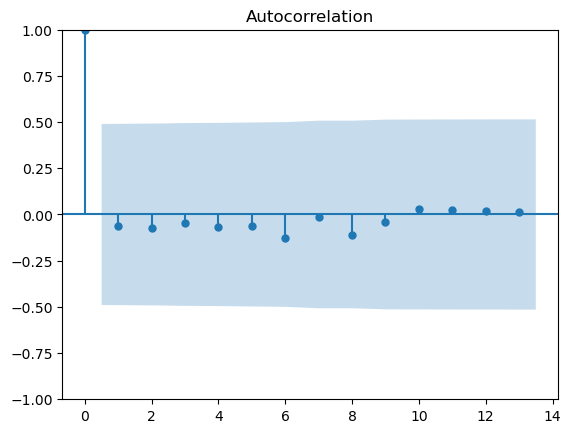

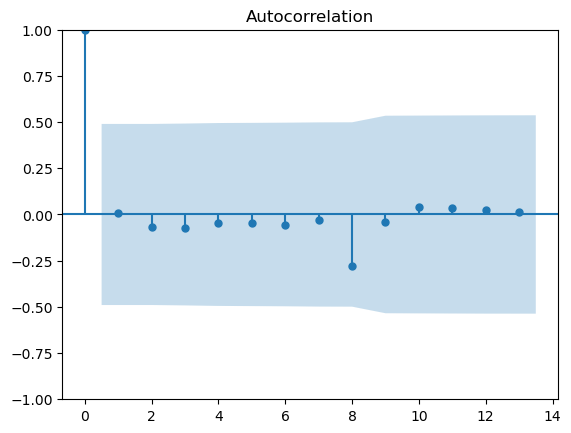

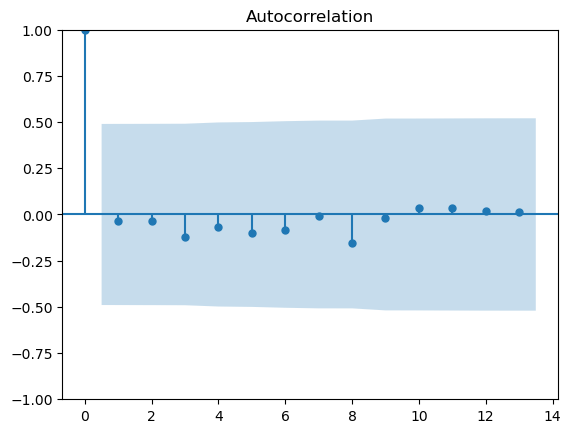

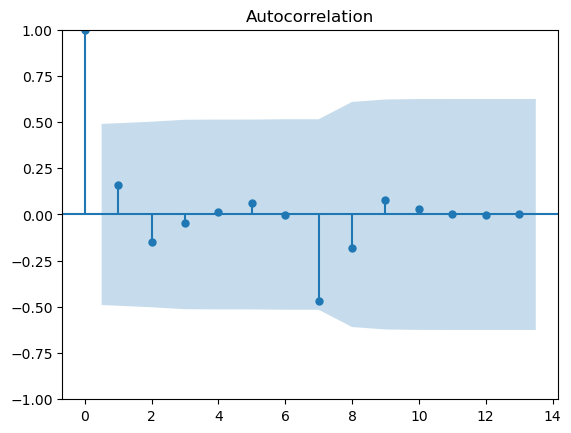

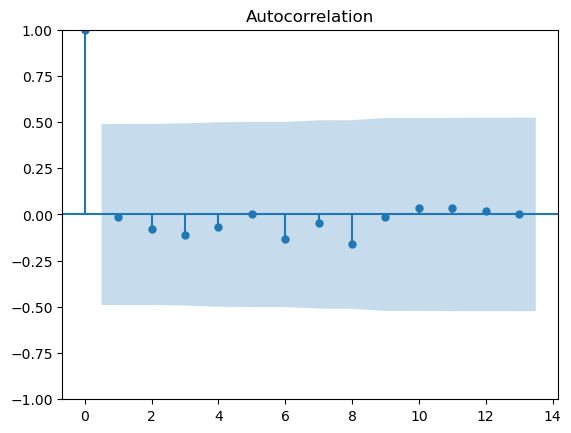

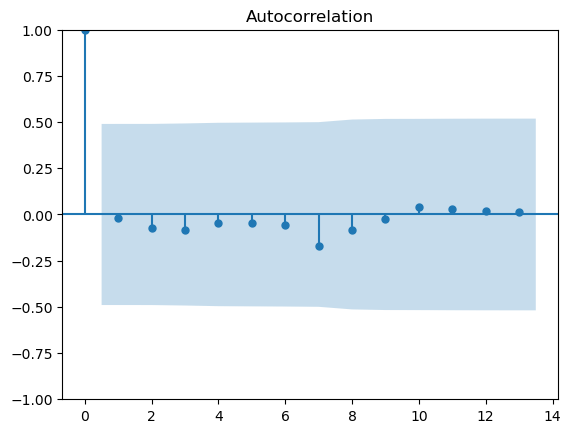

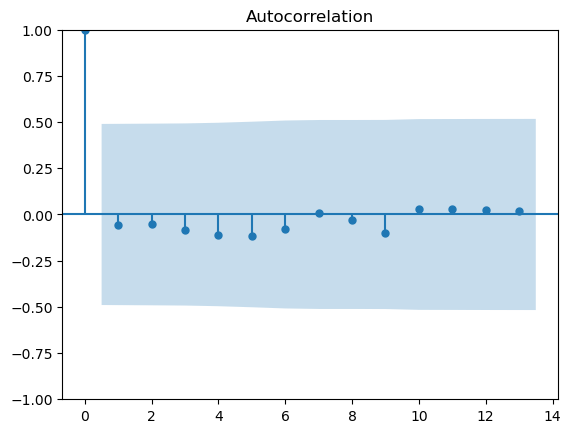

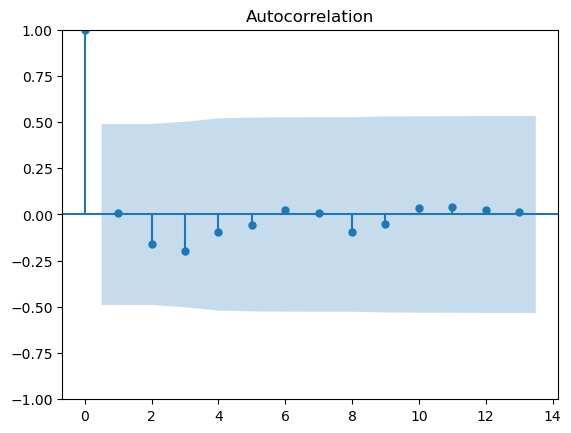

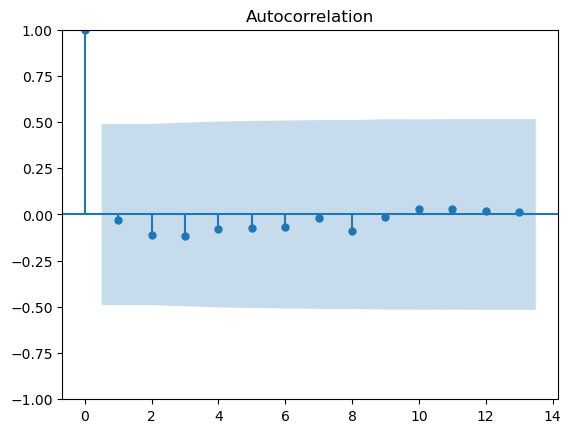

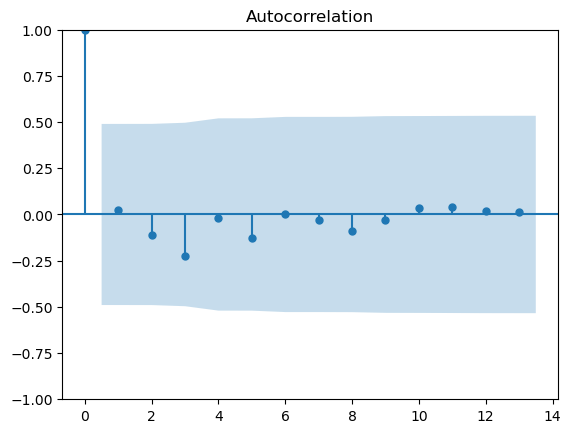

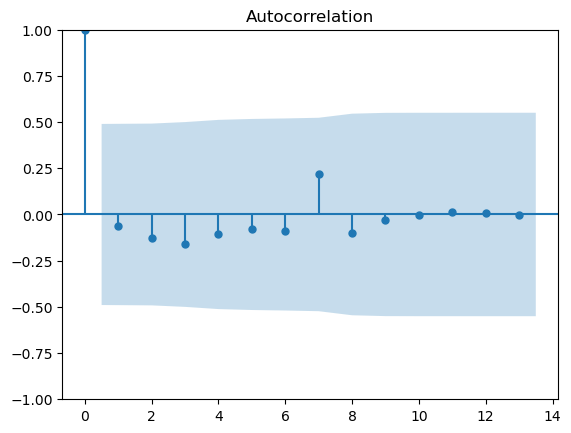

In [9]:
for occ_code, group_df in grouped_data.items():
    df = group_df["train"]
    acf_original = plot_acf(df)

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


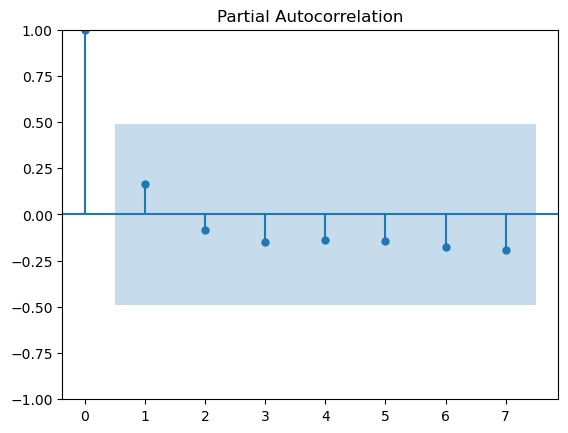

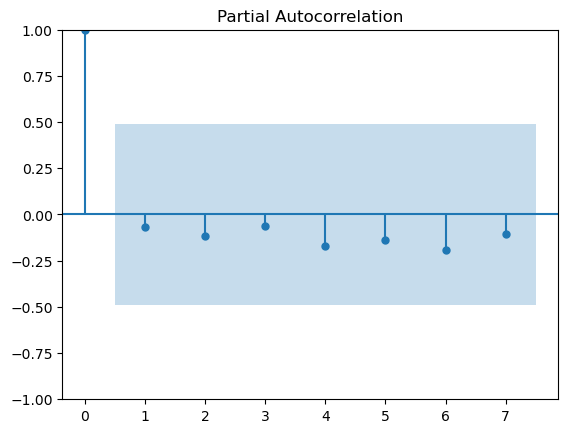

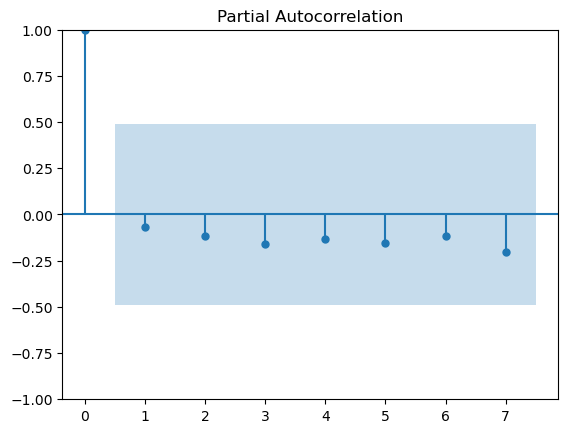

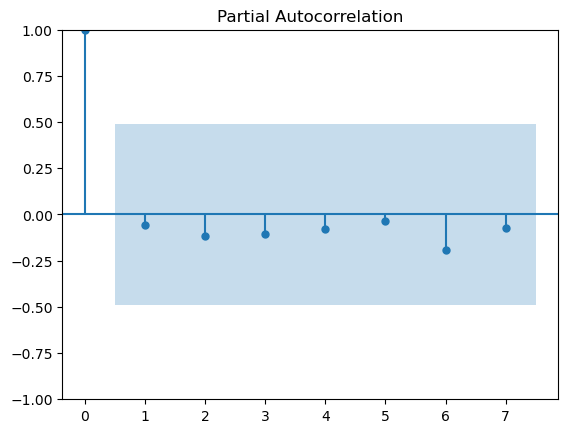

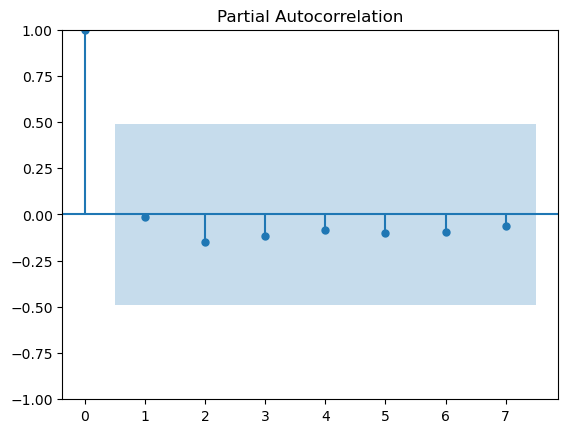

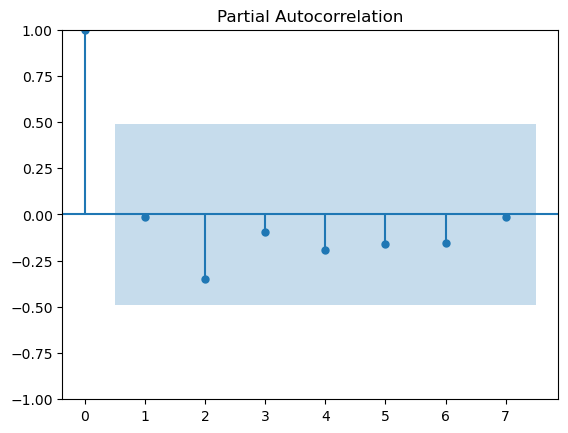

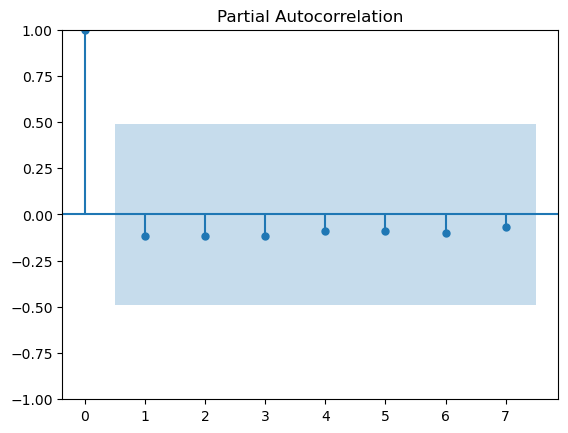

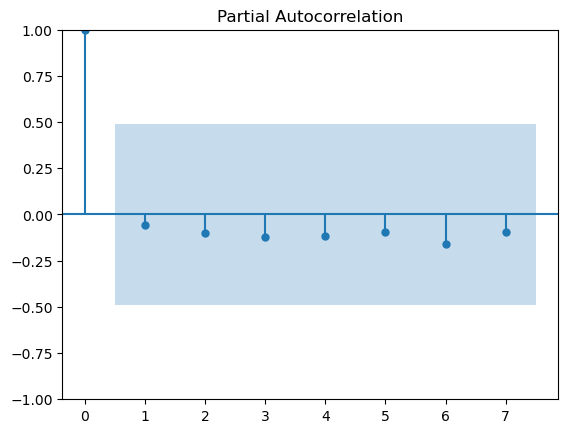

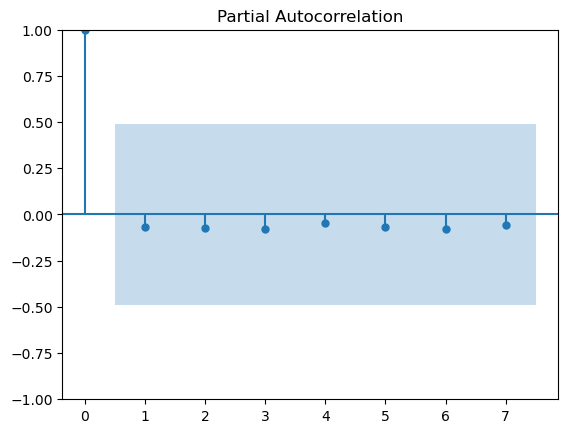

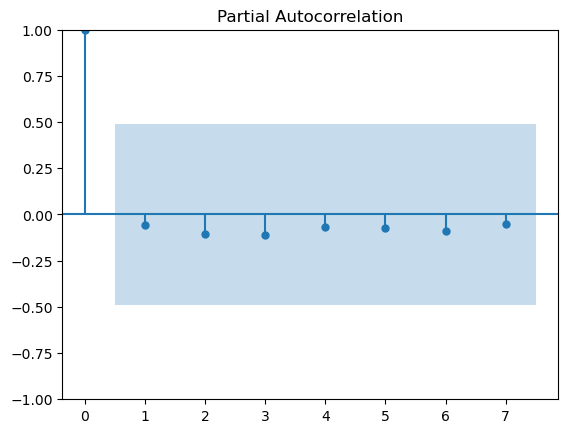

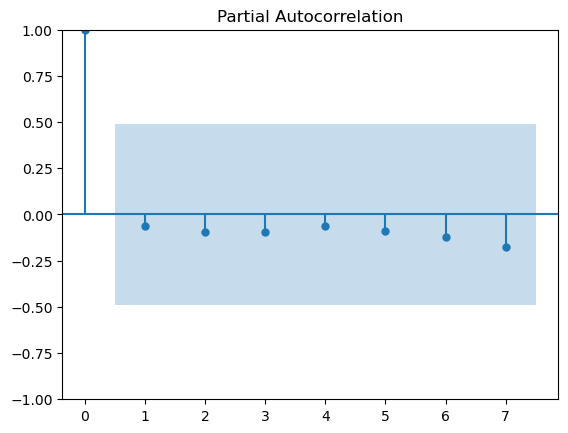

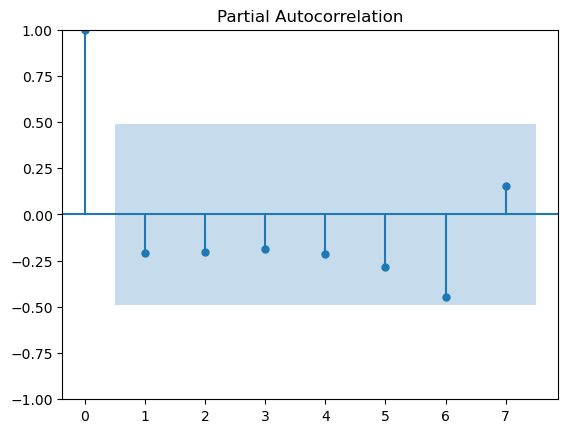

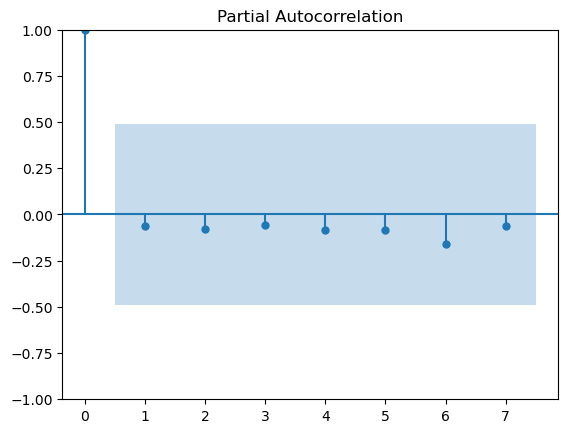

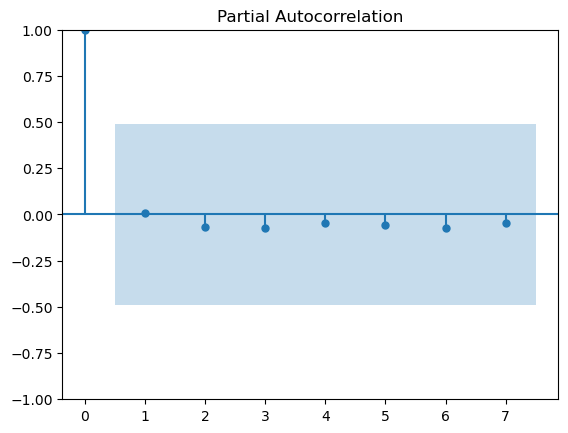

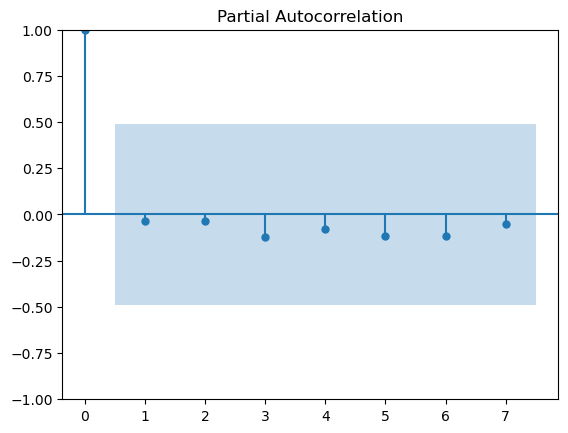

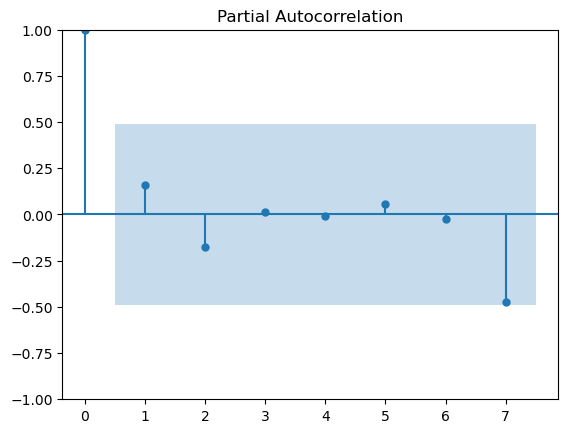

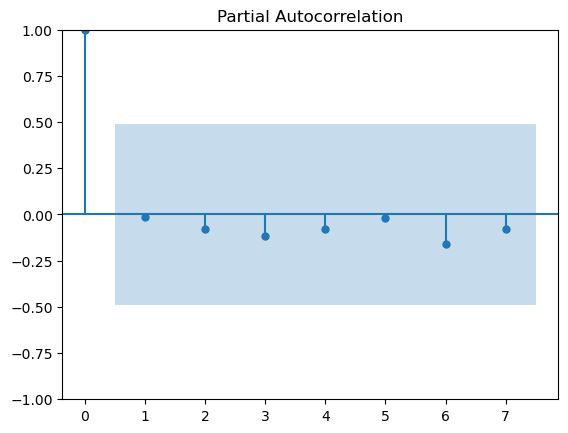

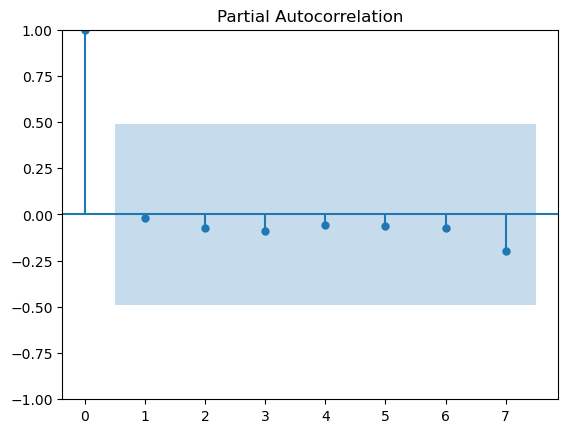

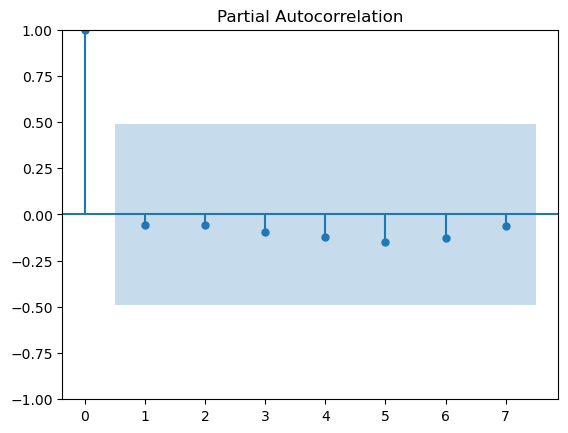

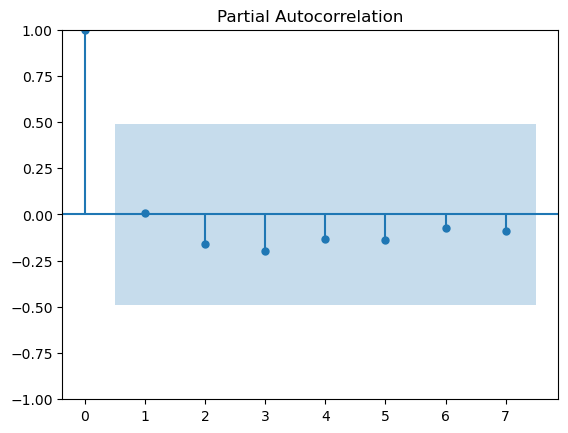

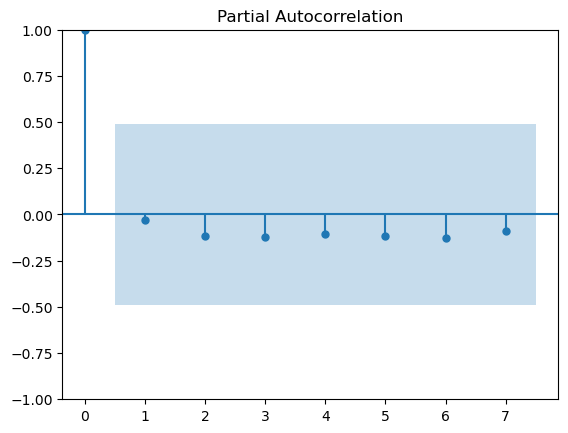

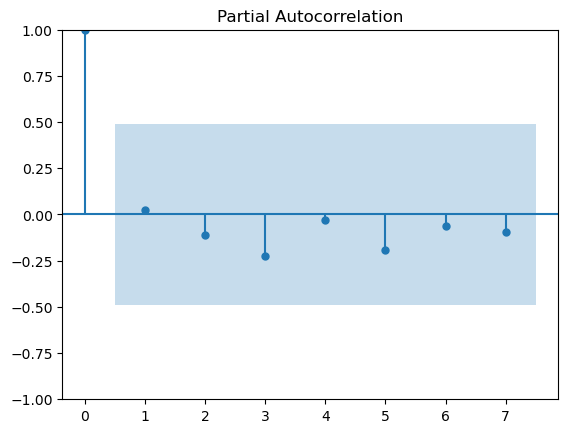

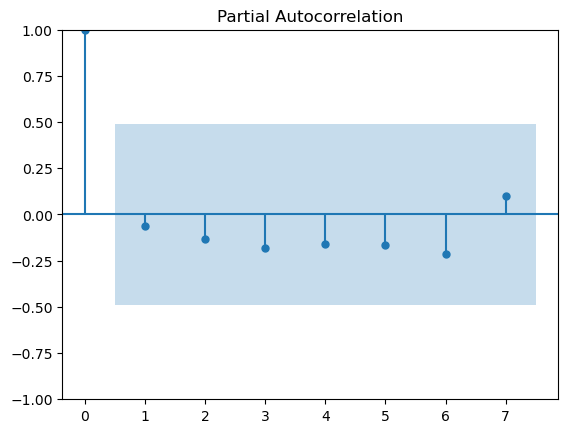

In [10]:
for occ_code, group_df in grouped_data.items():
    df = group_df["train"]
    pacf_original = plot_pacf(df, lags=7)

# Create Models

In [11]:
ARmodels = {}

for occ_code, group_df in timeseries_data.items():
    df = group_df["train"]
    model = ARIMA(df, order=(2,1,0))
    model_fit = model.fit()
    print(model_fit.summary())
    ARmodels[occ_code] = model_fit

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

                               SARIMAX Results                                
Dep. Variable:                TOT_EMP   No. Observations:                   17
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  38.454
Date:                Tue, 19 Nov 2024   AIC                            -70.909
Time:                        22:10:28   BIC                            -68.591
Sample:                             0   HQIC                           -70.790
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2093      0.297      0.705      0.481      -0.372       0.791
ar.L2         -0.0705      0.499     -0.141      0.888      -1.049       0.908
sigma2         0.0005      0.000      1.964      0.0

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

                               SARIMAX Results                                
Dep. Variable:                TOT_EMP   No. Observations:                   17
Model:                 ARIMA(2, 1, 0)   Log Likelihood                   2.501
Date:                Tue, 19 Nov 2024   AIC                              0.998
Time:                        22:10:29   BIC                              3.315
Sample:                             0   HQIC                             1.116
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0006      6.778  -8.73e-05      1.000     -13.286      13.284
ar.L2          0.0500      2.110      0.024      0.981      -4.085       4.185
sigma2         0.0428      0.010      4.385      0.0

                               SARIMAX Results                                
Dep. Variable:                TOT_EMP   No. Observations:                   17
Model:                 ARIMA(2, 1, 0)   Log Likelihood                   4.181
Date:                Tue, 19 Nov 2024   AIC                             -2.363
Time:                        22:10:29   BIC                             -0.045
Sample:                             0   HQIC                            -2.244
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0482      3.176      0.015      0.988      -6.177       6.274
ar.L2         -0.0025      2.908     -0.001      0.999      -5.702       5.697
sigma2         0.0347      0.013      2.644      0.0

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473

In [12]:
MAmodels = {}

for occ_code, group_df in timeseries_data.items():
    df = group_df["train"]
    model = ARIMA(df, order=(0,1,2))
    model_fit = model.fit()
    print(model_fit.summary())
    MAmodels[occ_code] = model_fit

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

                               SARIMAX Results                                
Dep. Variable:                TOT_EMP   No. Observations:                   17
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  38.442
Date:                Tue, 19 Nov 2024   AIC                            -70.884
Time:                        22:10:29   BIC                            -68.566
Sample:                             0   HQIC                           -70.765
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2004      0.296      0.677      0.498      -0.379       0.780
ma.L2          0.0242      0.644      0.038      0.970      -1.239       1.287
sigma2         0.0005      0.000      2.247      0.0

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                TOT_EMP   No. Observations:                   17
Model:                 ARIMA(0, 1, 2)   Log Likelihood                   4.767
Date:                Tue, 19 Nov 2024   AIC                             -3.535
Time:                        22:10:29   BIC                             -1.217
Sample:                             0   HQIC                            -3.416
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0486      1.958      0.025      0.980      -3.789       3.886
ma.L2         -0.0593      0.808     -0.073      0.941      -1.643       1.524
sigma2         0.0322      0.007      4.366      0.0

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

                               SARIMAX Results                                
Dep. Variable:                TOT_EMP   No. Observations:                   17
Model:                 ARIMA(0, 1, 2)   Log Likelihood                   5.307
Date:                Tue, 19 Nov 2024   AIC                             -4.614
Time:                        22:10:29   BIC                             -2.297
Sample:                             0   HQIC                            -4.496
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0185     12.282      0.002      0.999     -24.054      24.091
ma.L2          0.0295      7.388      0.004      0.997     -14.450      14.509
sigma2         0.0302      0.008      3.948      0.0

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

                               SARIMAX Results                                
Dep. Variable:                TOT_EMP   No. Observations:                   17
Model:                 ARIMA(0, 1, 2)   Log Likelihood                   5.230
Date:                Tue, 19 Nov 2024   AIC                             -4.460
Time:                        22:10:30   BIC                             -2.142
Sample:                             0   HQIC                            -4.341
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0237      8.759      0.003      0.998     -17.143      17.190
ma.L2          0.0198     19.740      0.001      0.999     -38.670      38.710
sigma2         0.0304      0.010      3.135      0.0

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

                               SARIMAX Results                                
Dep. Variable:                TOT_EMP   No. Observations:                   17
Model:                 ARIMA(0, 1, 2)   Log Likelihood                   4.159
Date:                Tue, 19 Nov 2024   AIC                             -2.317
Time:                        22:10:30   BIC                              0.001
Sample:                             0   HQIC                            -2.198
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0638      3.248      0.020      0.984      -6.303       6.430
ma.L2          0.0141      2.355      0.006      0.995      -4.602       4.630
sigma2         0.0348      0.009      3.845      0.0

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

                               SARIMAX Results                                
Dep. Variable:                TOT_EMP   No. Observations:                   17
Model:                 ARIMA(0, 1, 2)   Log Likelihood                   4.622
Date:                Tue, 19 Nov 2024   AIC                             -3.243
Time:                        22:10:30   BIC                             -0.925
Sample:                             0   HQIC                            -3.124
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0284      1.982      0.014      0.989      -3.855       3.912
ma.L2         -0.0888      0.499     -0.178      0.859      -1.067       0.889
sigma2         0.0328      0.012      2.818      0.0

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

# Forecast and Plot

In [13]:
def calculate_normalized_rmse(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    normalization_factor = np.mean(actual)  # Or use the range: np.ptp(actual)
    normalized_rmse = rmse / normalization_factor
    return normalized_rmse

In [14]:
def calculate_r2(actual, predicted):
    r2 = r2_score(actual, predicted)
    return r2

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

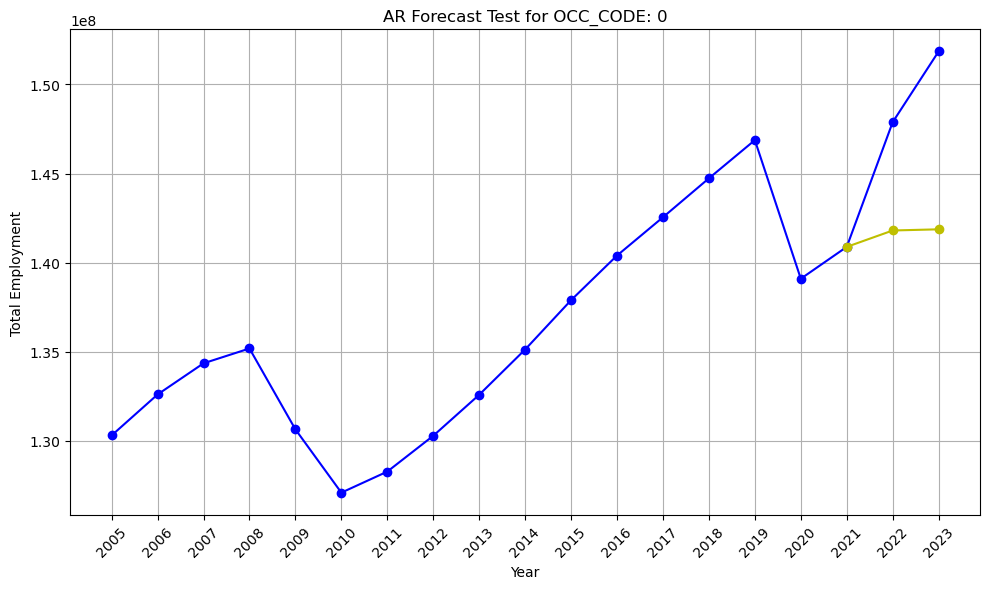

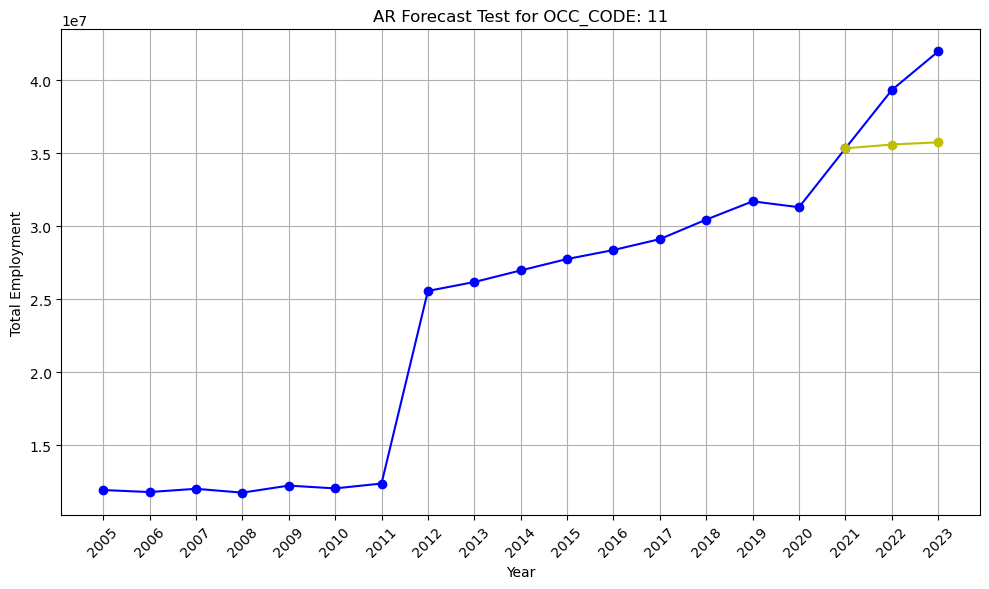

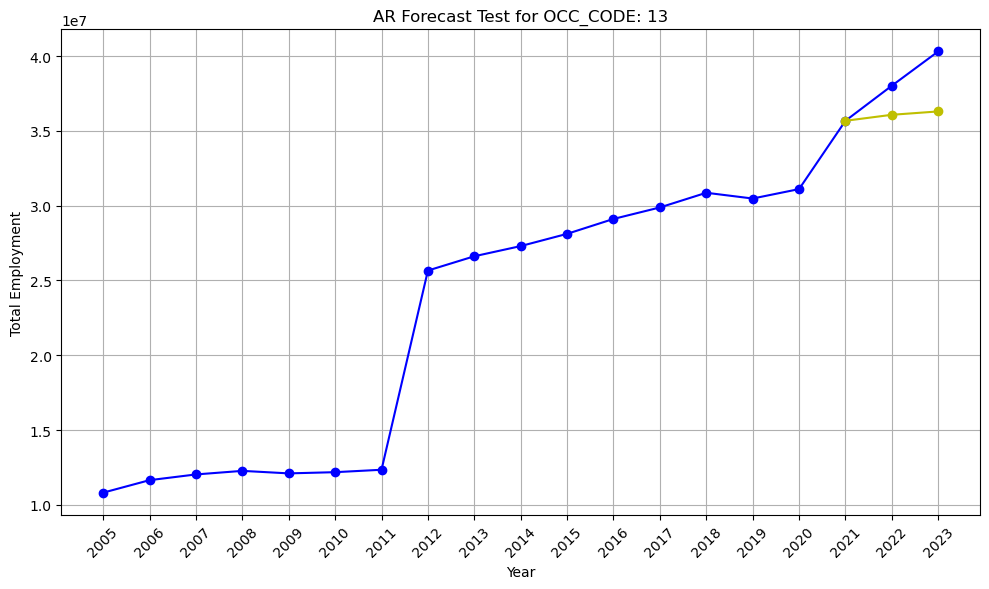

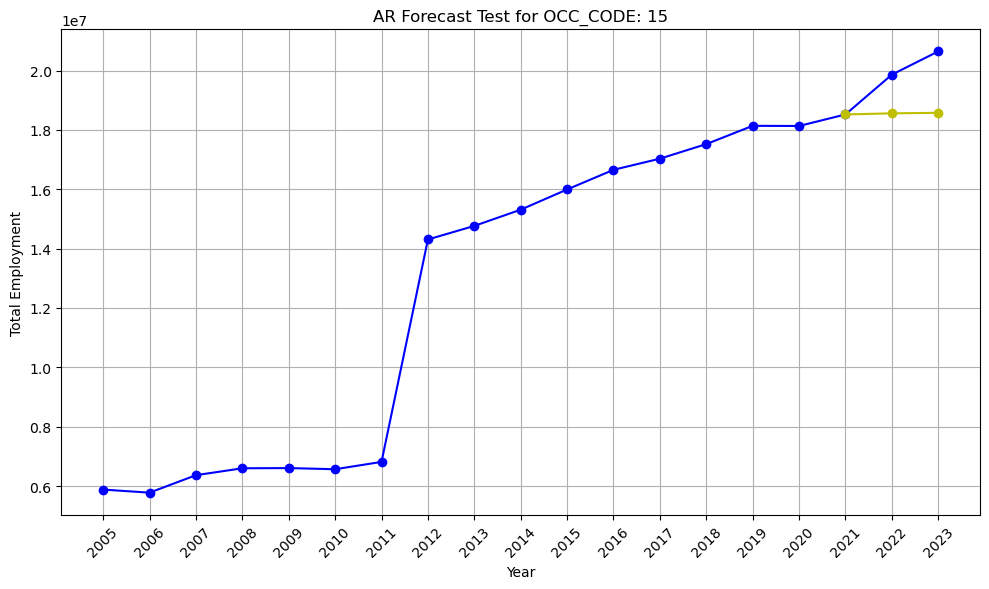

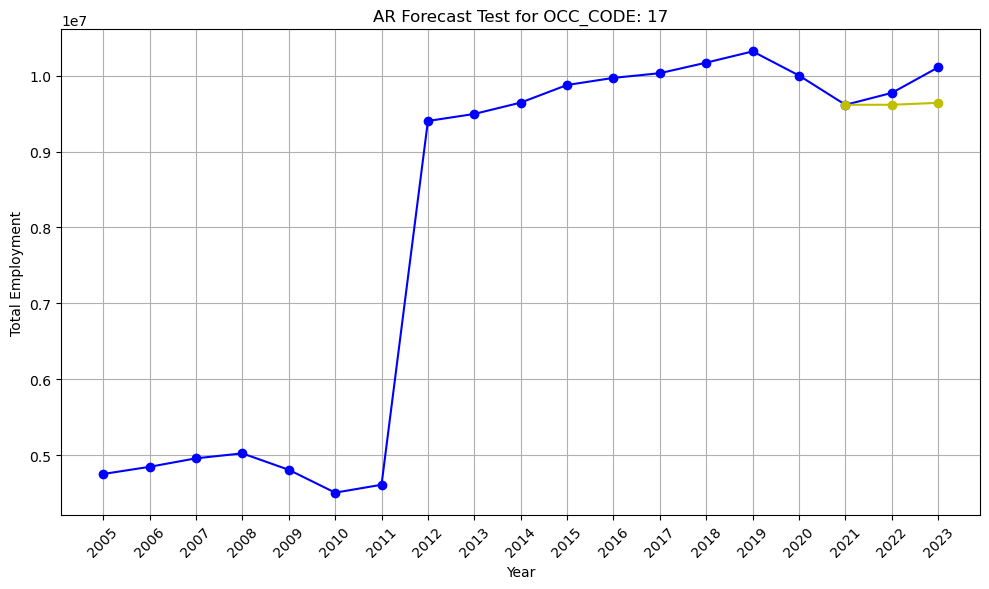

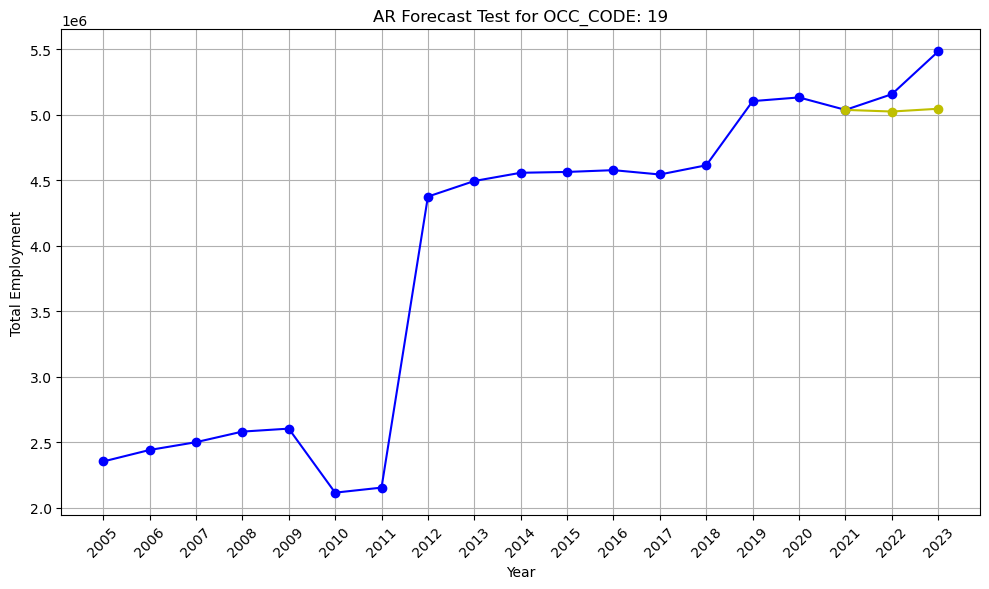

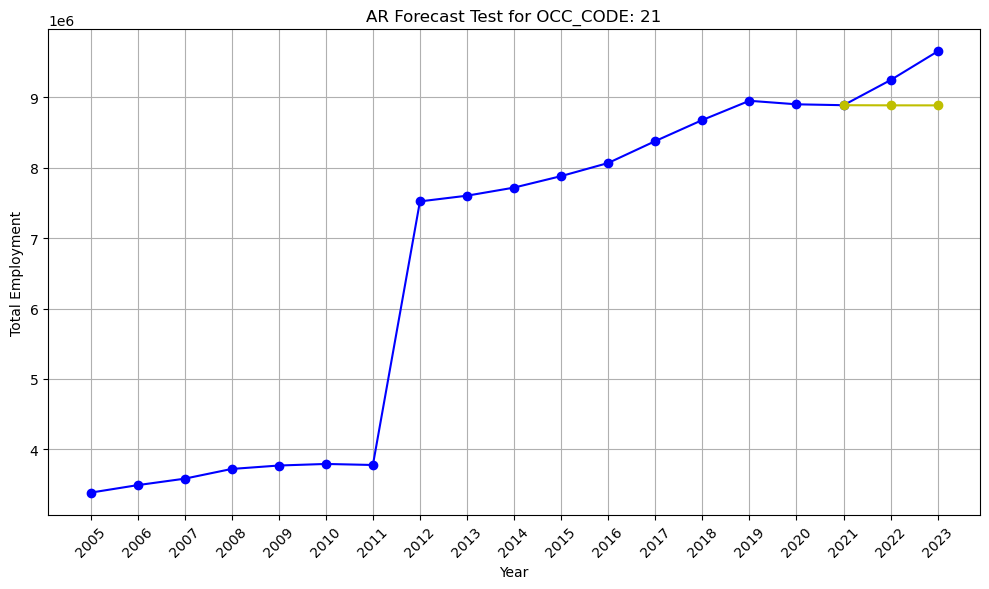

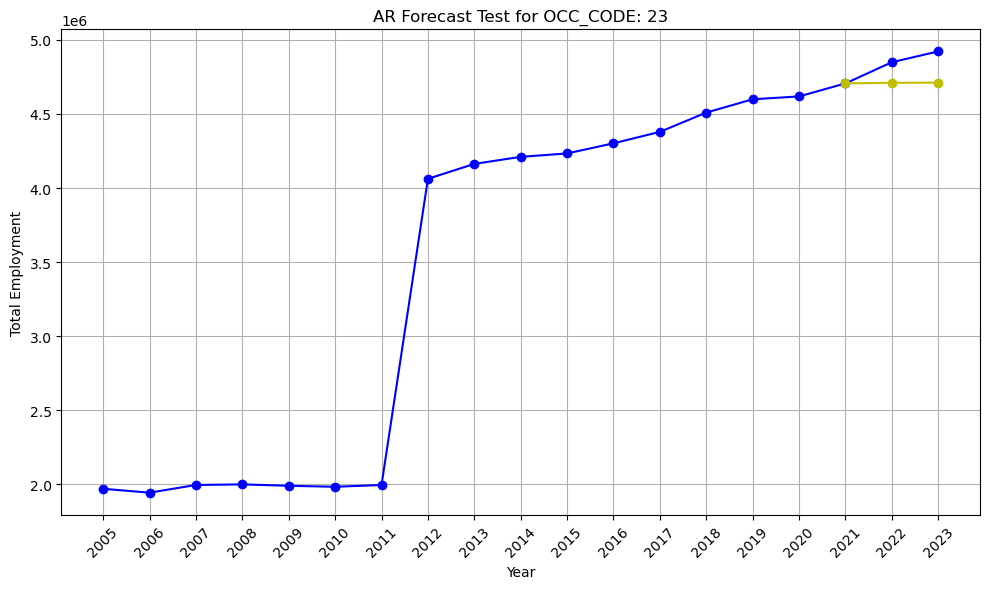

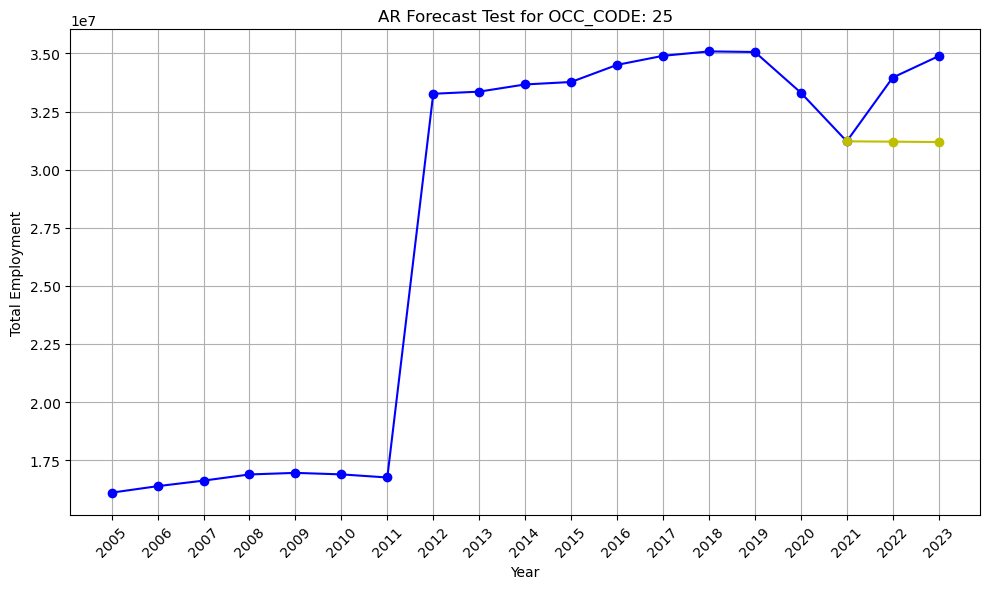

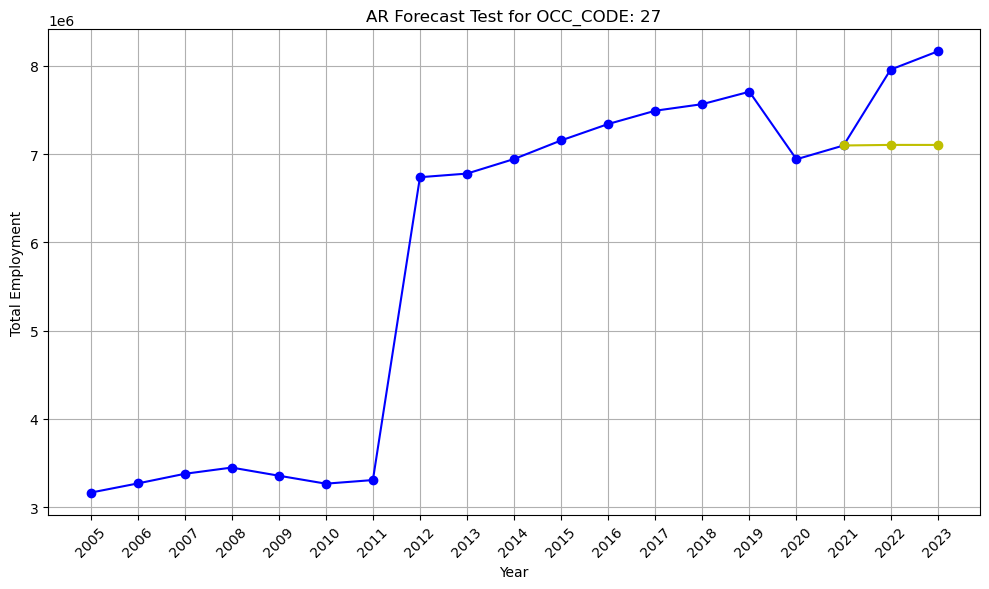

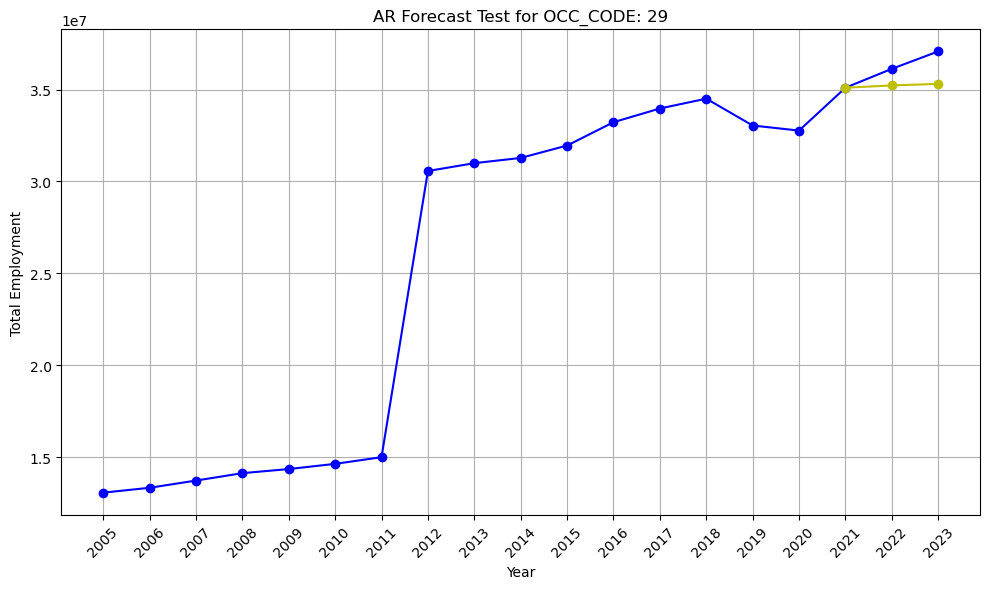

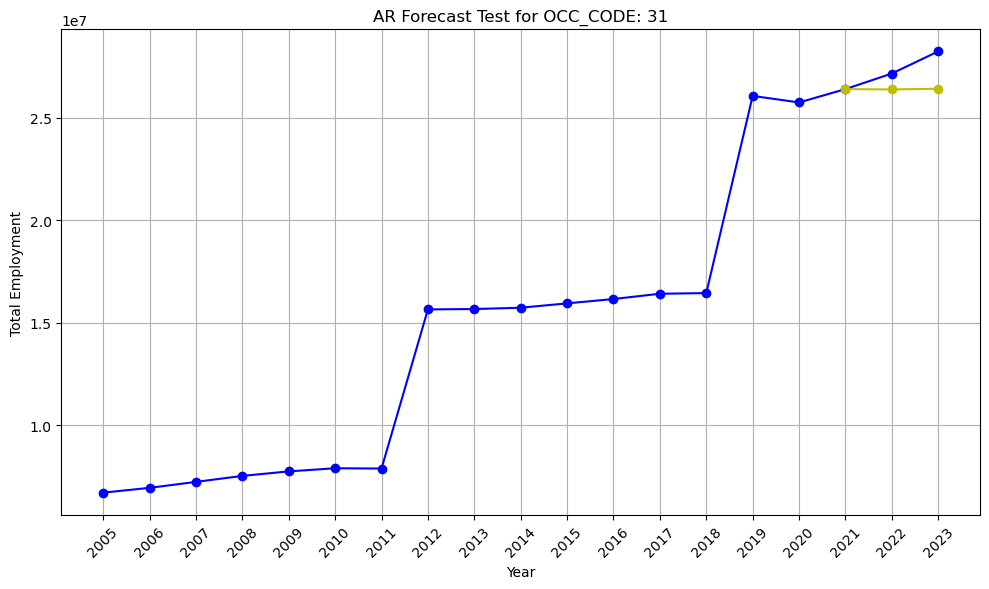

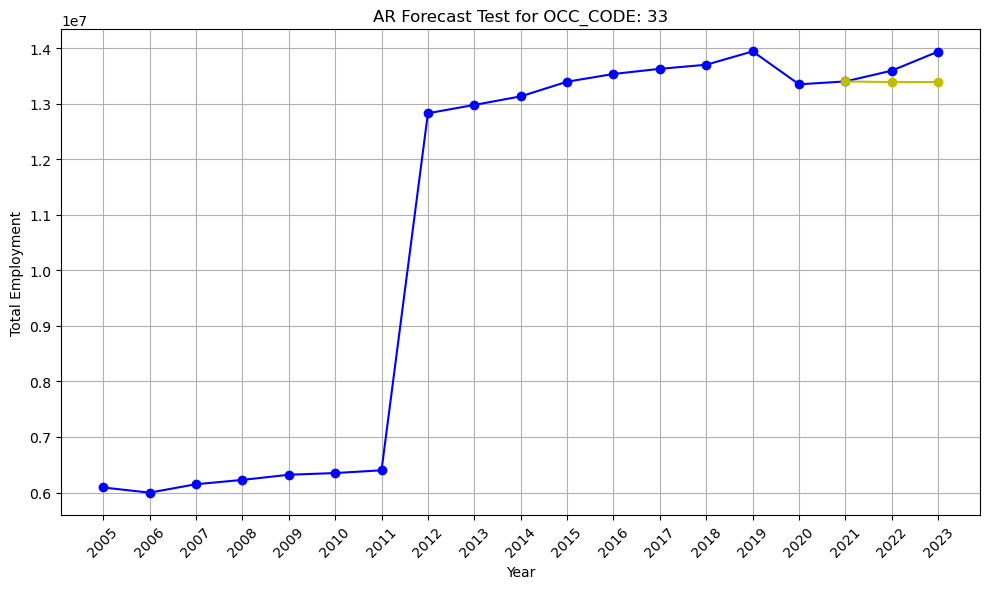

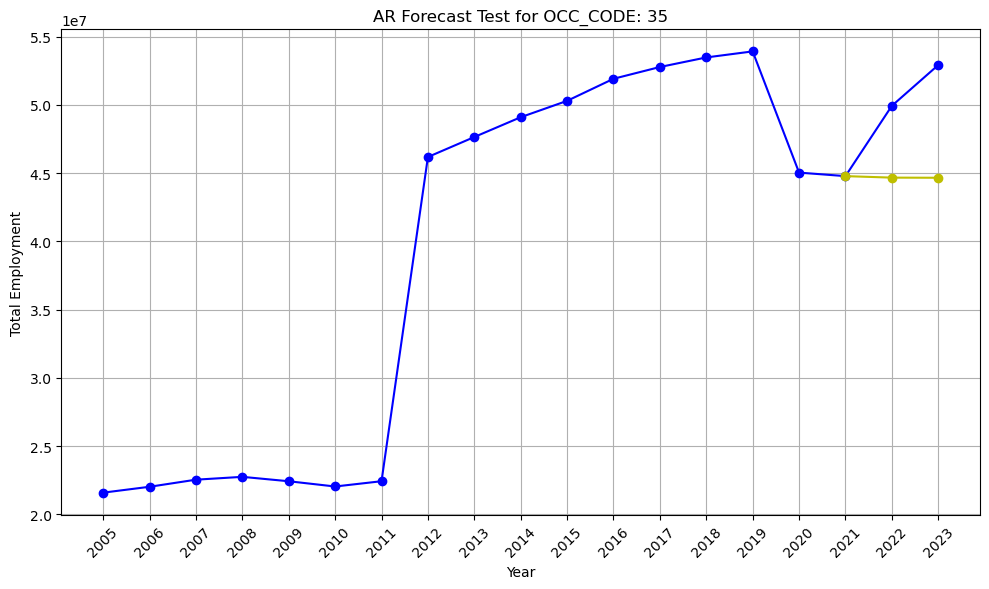

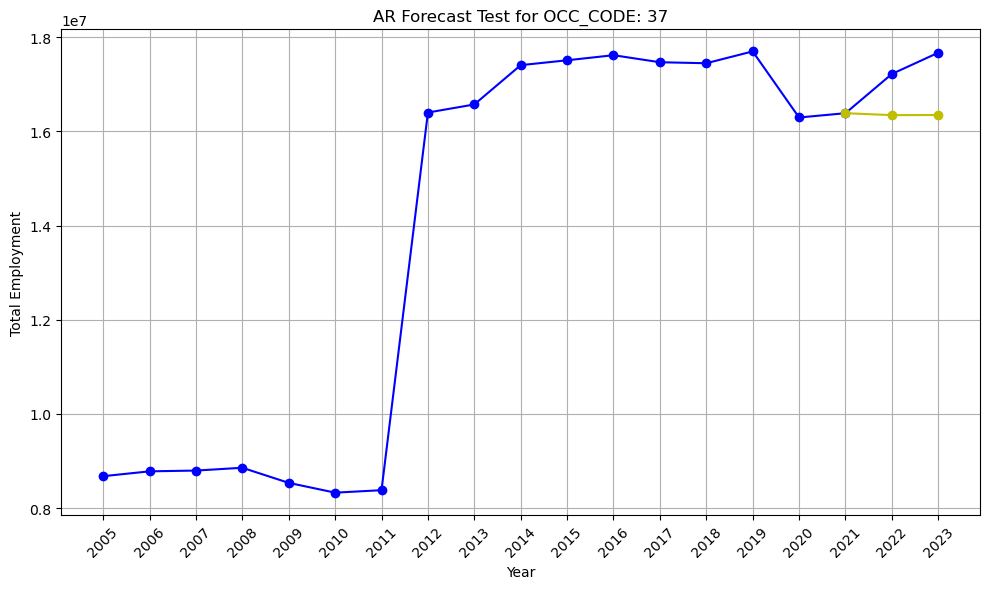

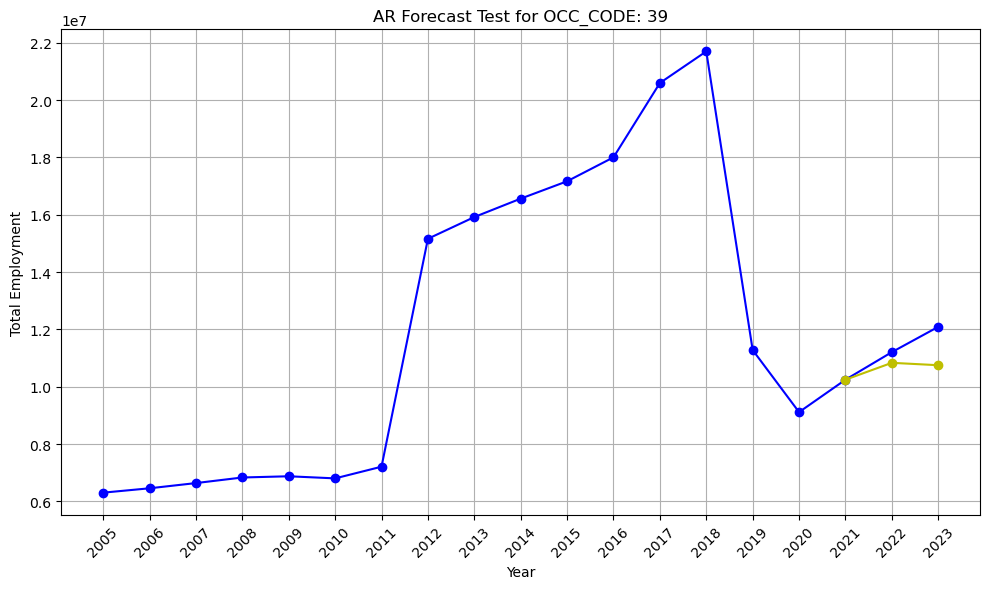

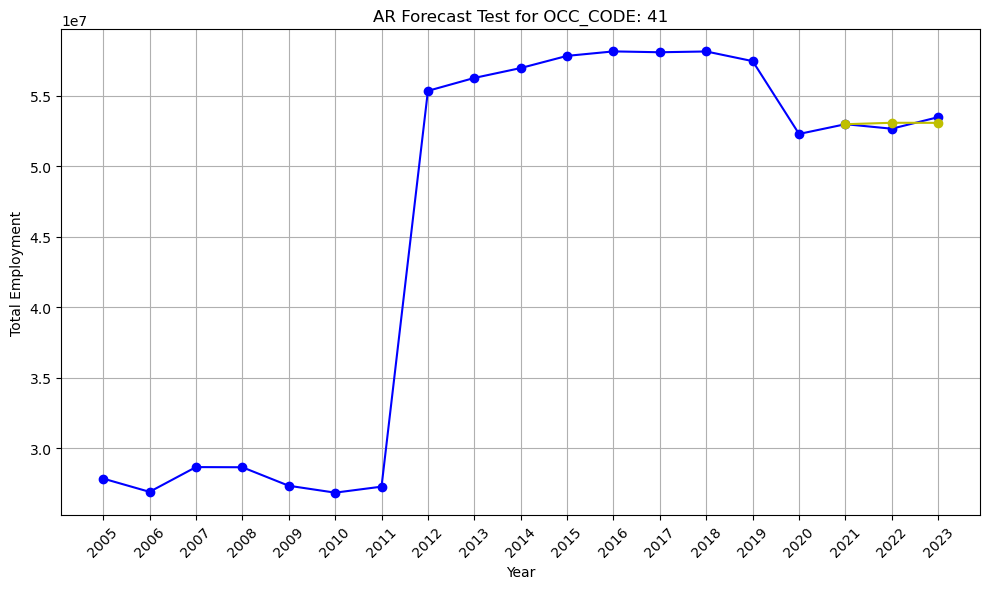

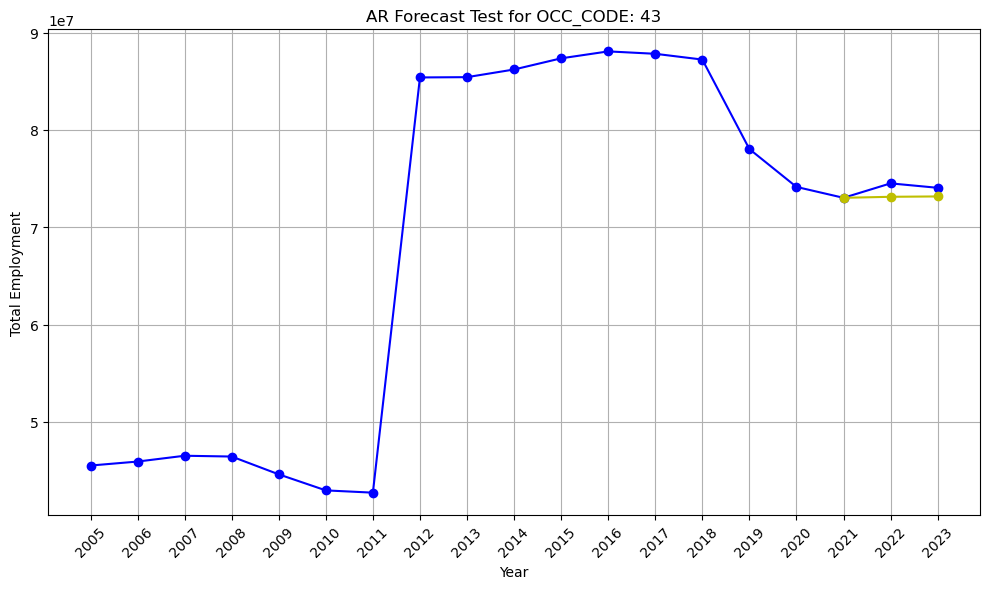

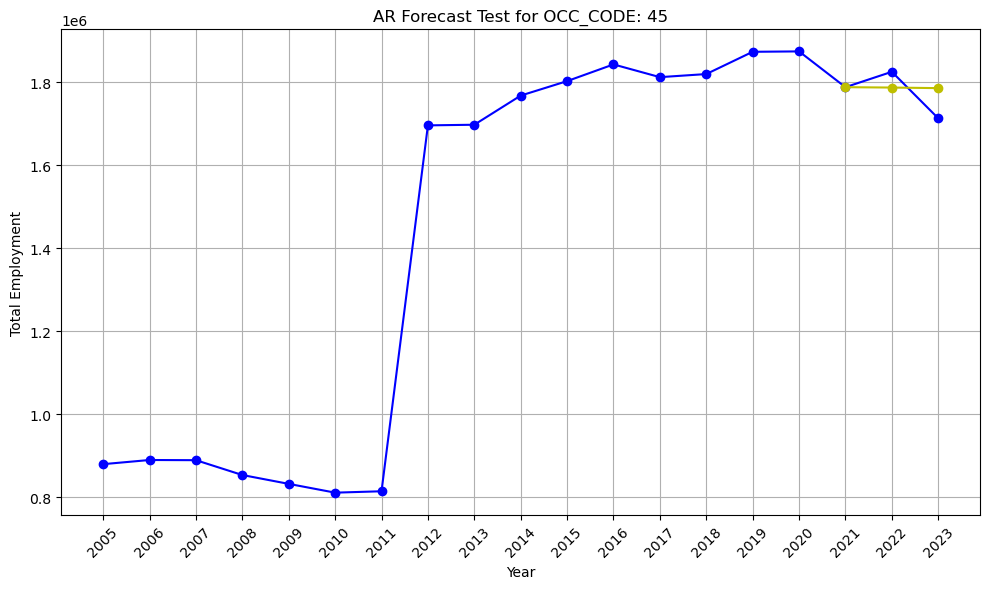

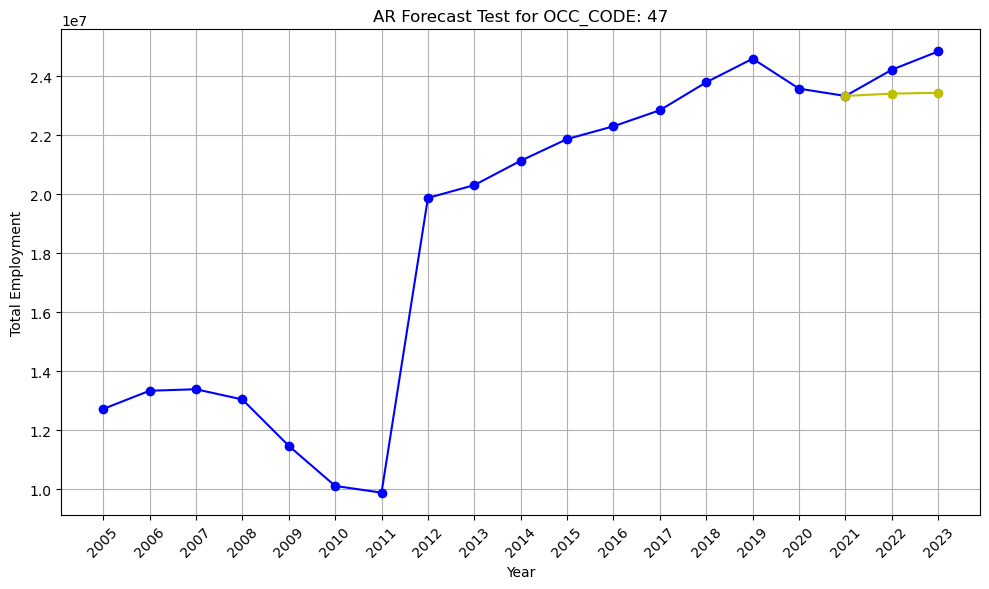

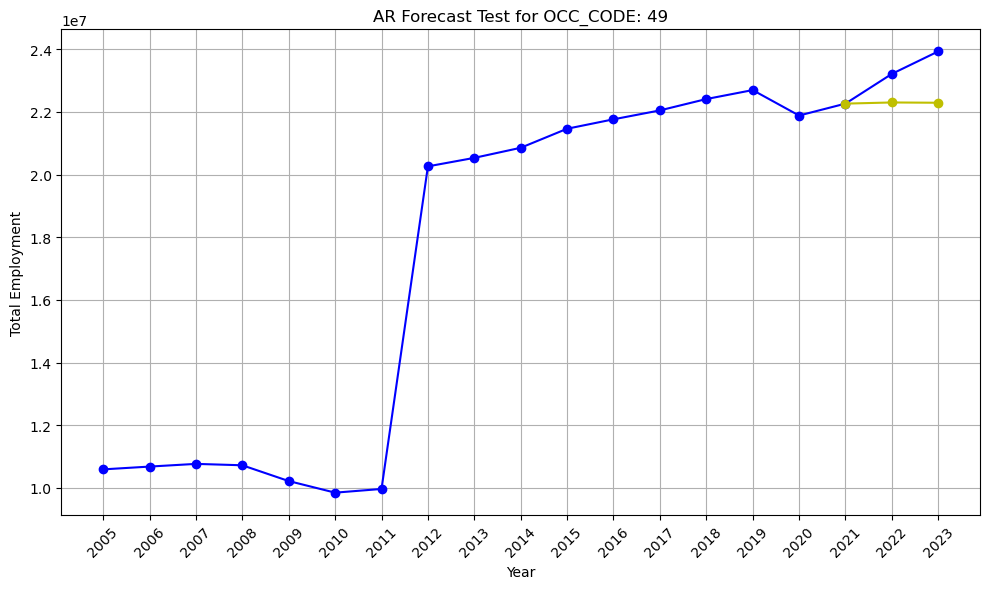

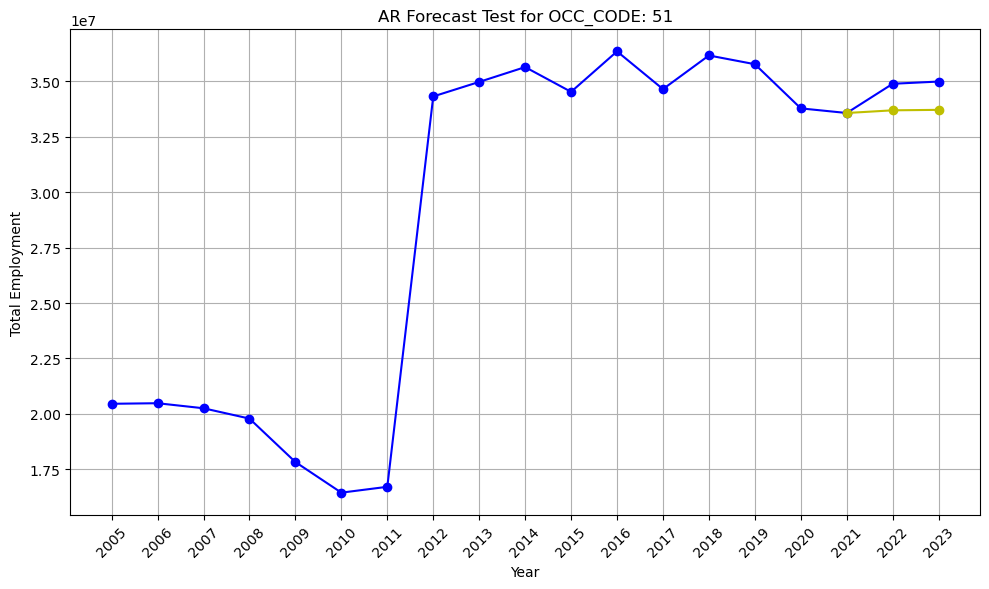

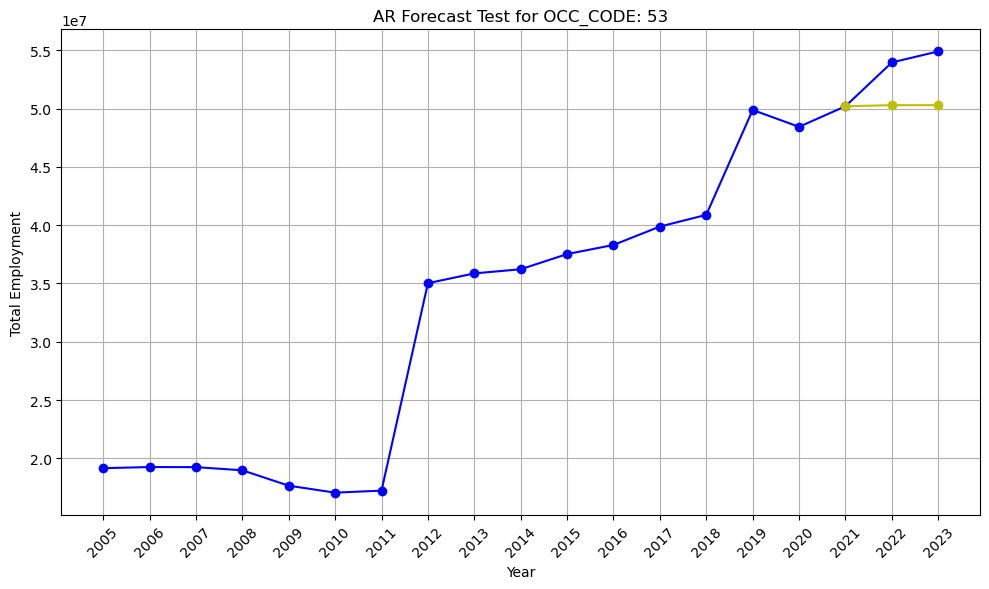

In [19]:
all_normalized_rmse_AR = []
all_r2_AR = []

for occ_code, group_df in timeseries_data.items():
    train = group_df["train"]
    test = group_df["test"]
    ts_full = pd.concat([train, test], ignore_index=False)
    forecast_test = ARmodels[occ_code].forecast(len(test))
    
    #Calculte RMSE
    all_normalized_rmse_AR.append(calculate_normalized_rmse(np.exp(test["TOT_EMP"]), np.exp(forecast_test)))
    all_r2_AR.append(calculate_r2(np.exp(test["TOT_EMP"]), np.exp(forecast_test)))
    
    ts_full["Forecast_Manual"] = [None]*len(train) + list(forecast_test)
    ts_full.loc[EndYear, "Forecast_Manual"] = ts_full.loc[EndYear, "TOT_EMP"]
    ts_full_Exp = np.exp(ts_full)
    plt.figure(figsize=(10, 6))  # Optional: Set the size of the plot
    plt.plot(ts_full_Exp["TOT_EMP"], marker='o', linestyle='-', color='b')  # Line plot with markers
    plt.plot(ts_full_Exp["Forecast_Manual"], marker='o', linestyle='-', color='y')  # Line plot with markers
    plt.title(f'AR Forecast Test for OCC_CODE: {occ_code}')  # Title of the plot
    plt.xlabel('Year')  # X-axis label
    plt.ylabel('Total Employment')  # Y-axis label
    plt.grid(True)  # Display gridlines
    plt.xticks(ts_full_Exp.index, rotation=45)  # Rotate x-axis labels for better readability (optional)
    plt.tight_layout()  # Ensure the plot fits into the figure area
    
avg_normalized_rmse_AR = sum(all_normalized_rmse_AR) / len(all_normalized_rmse_AR)
avg_r2_AR = sum(all_r2_AR) / len(all_r2_AR)

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nathankinney/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a su

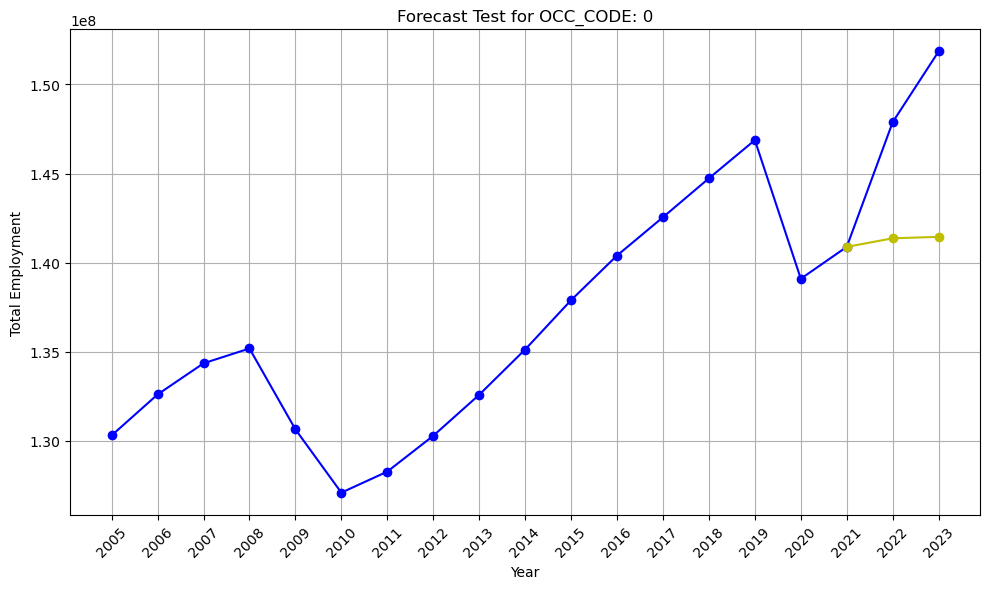

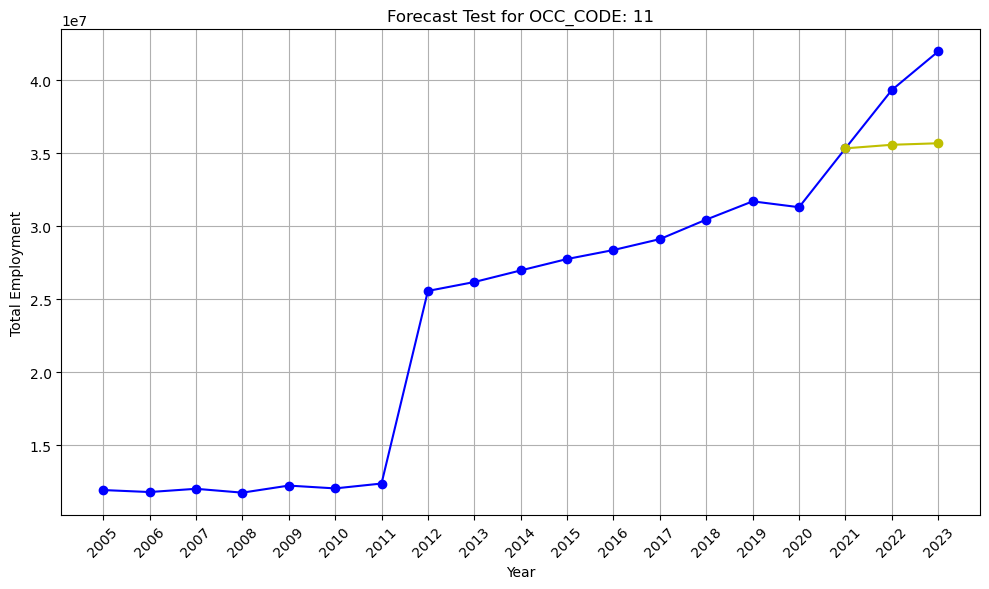

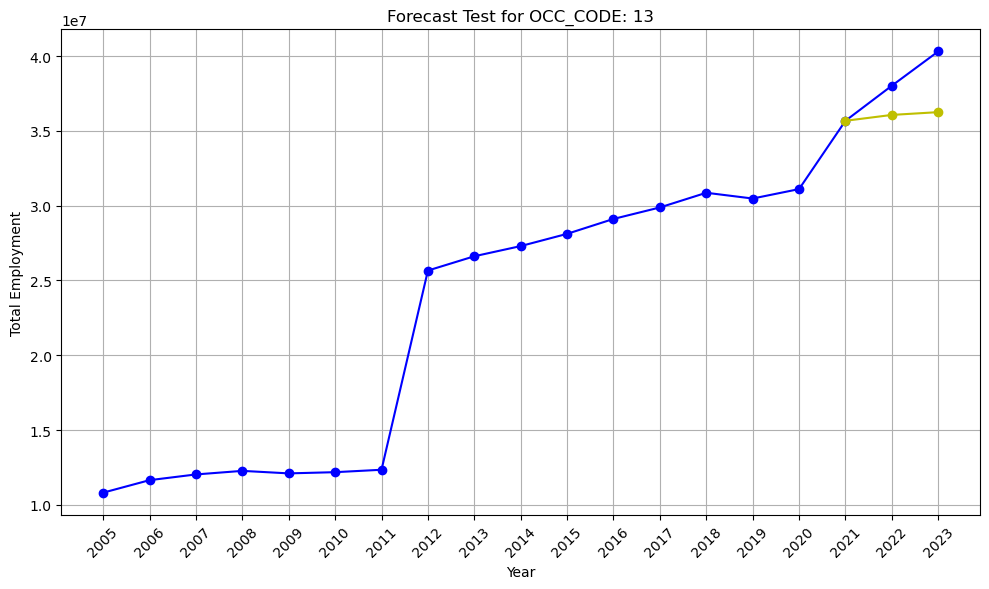

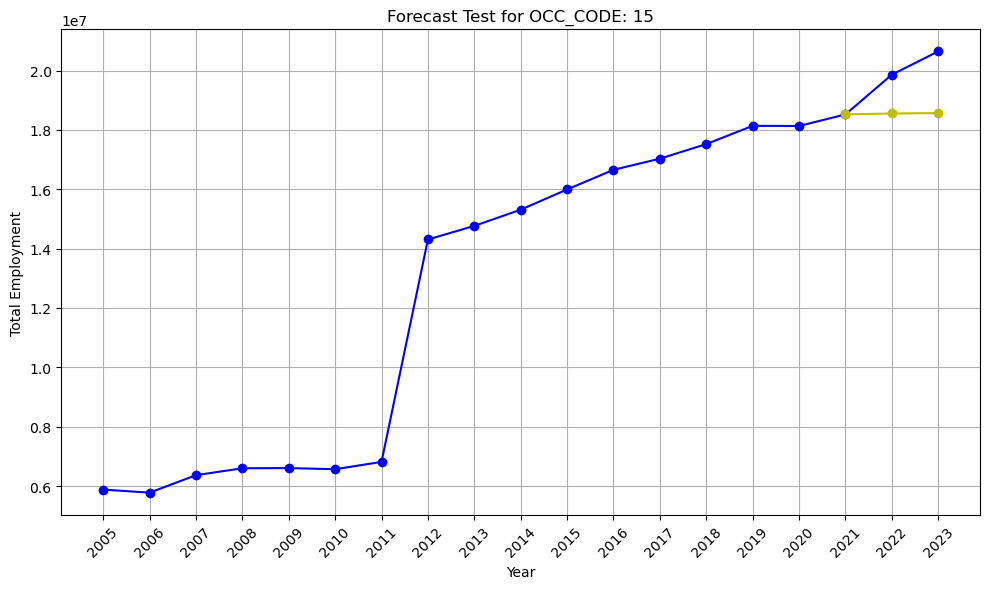

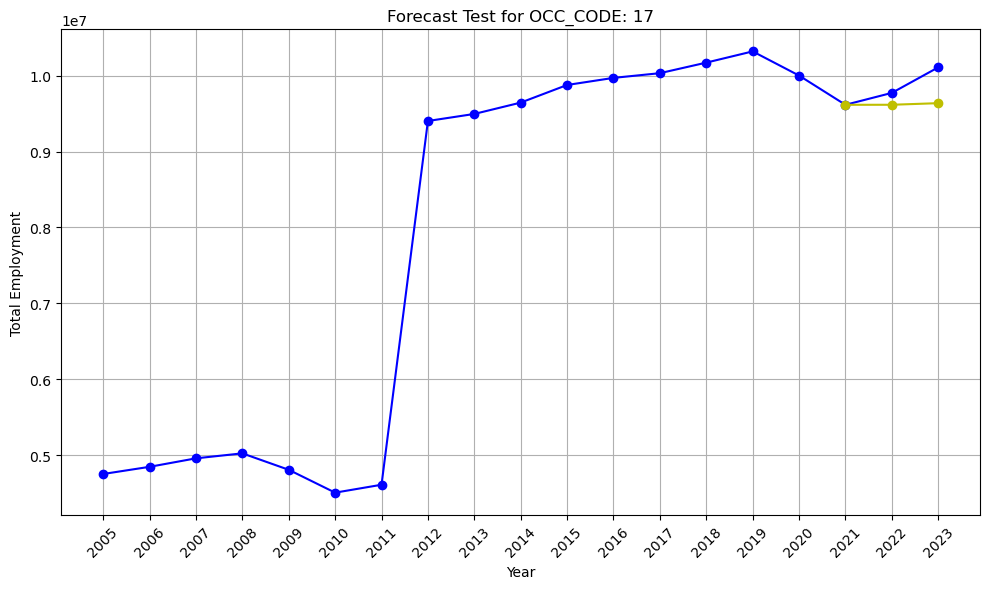

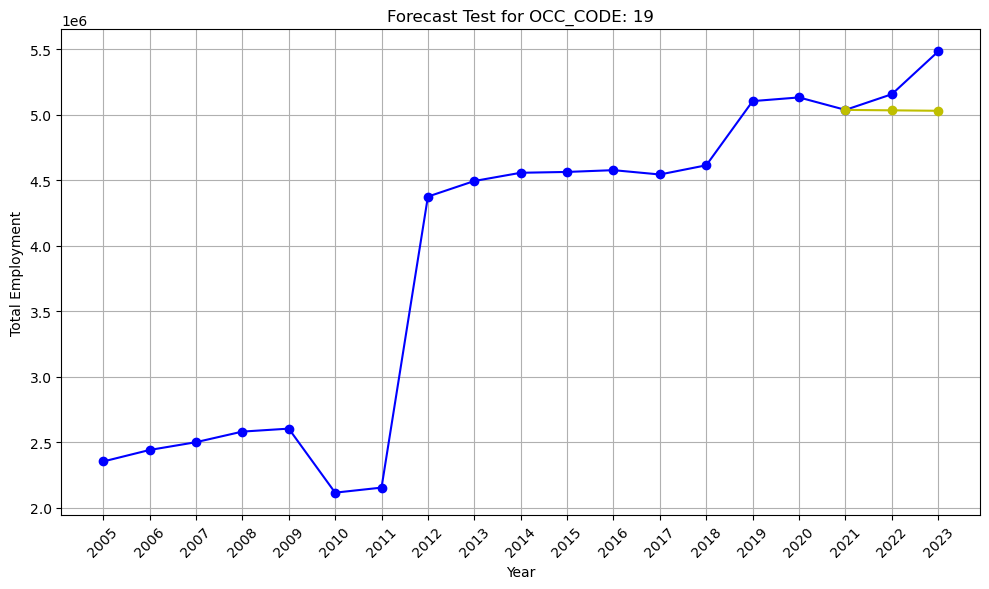

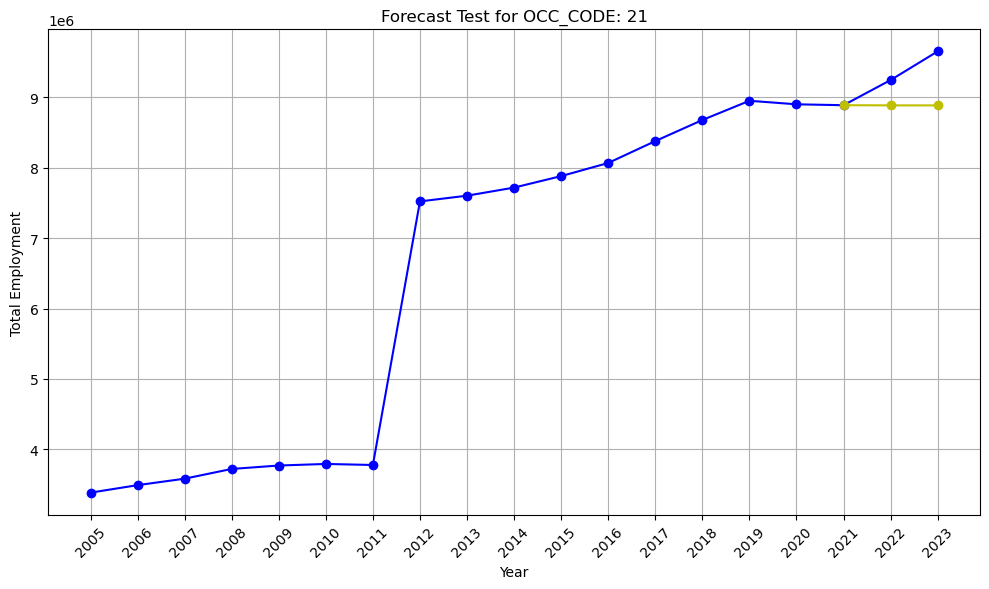

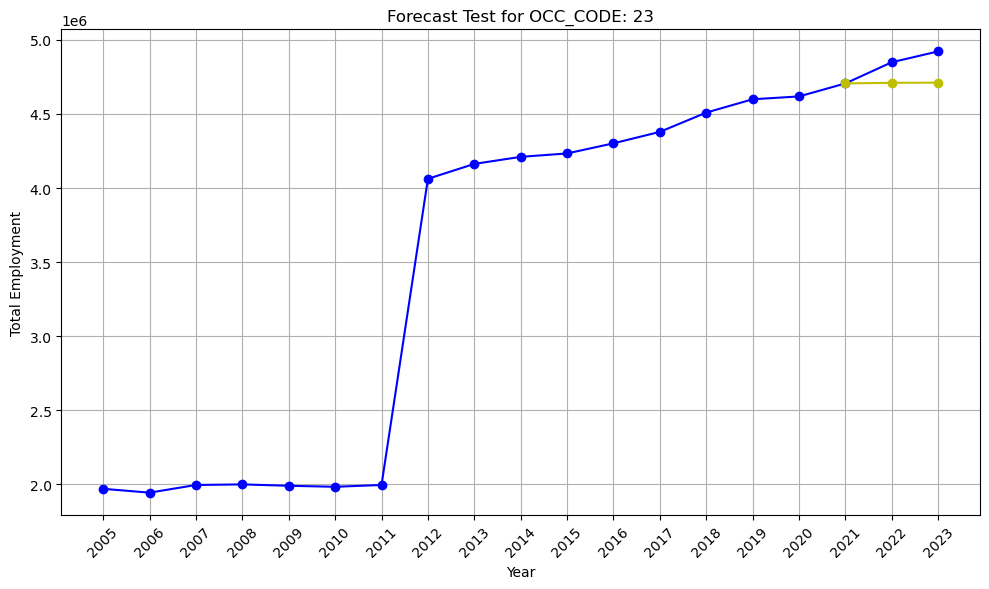

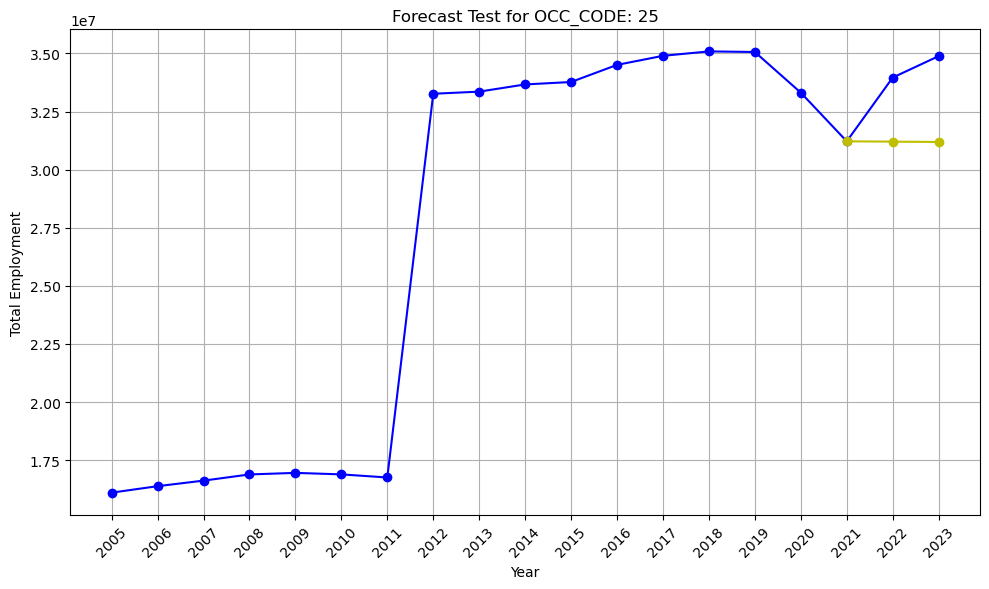

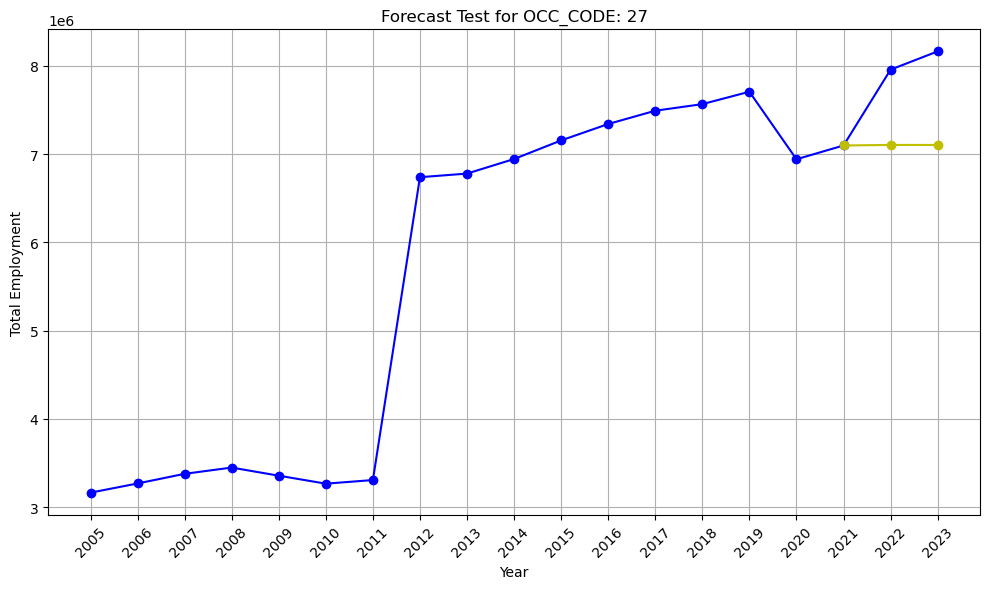

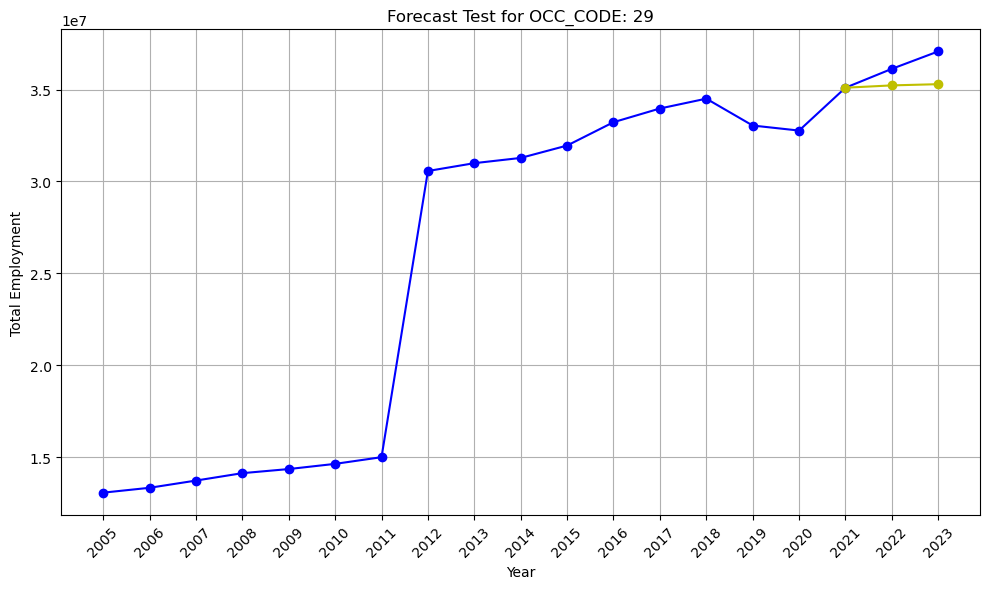

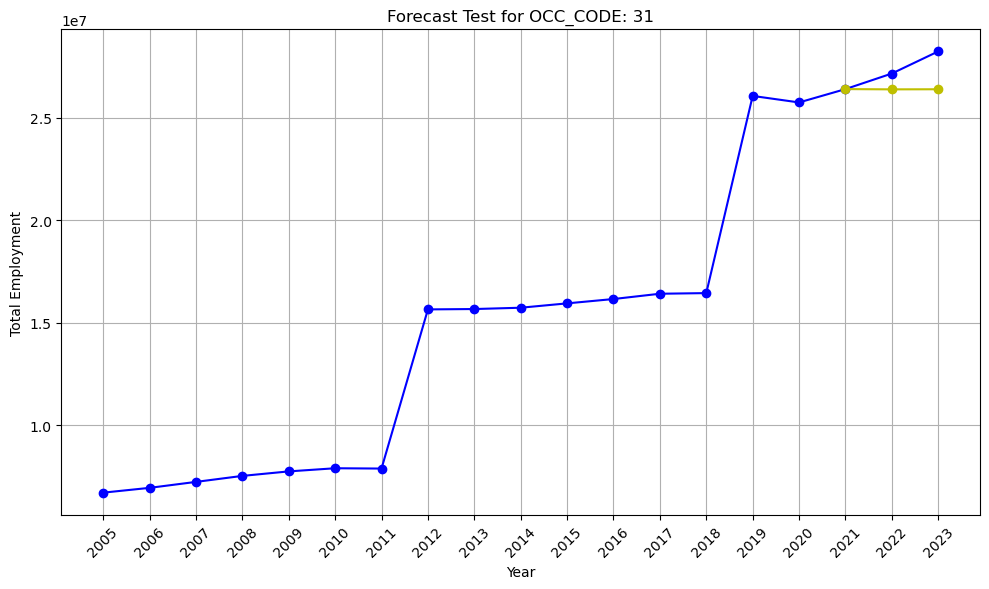

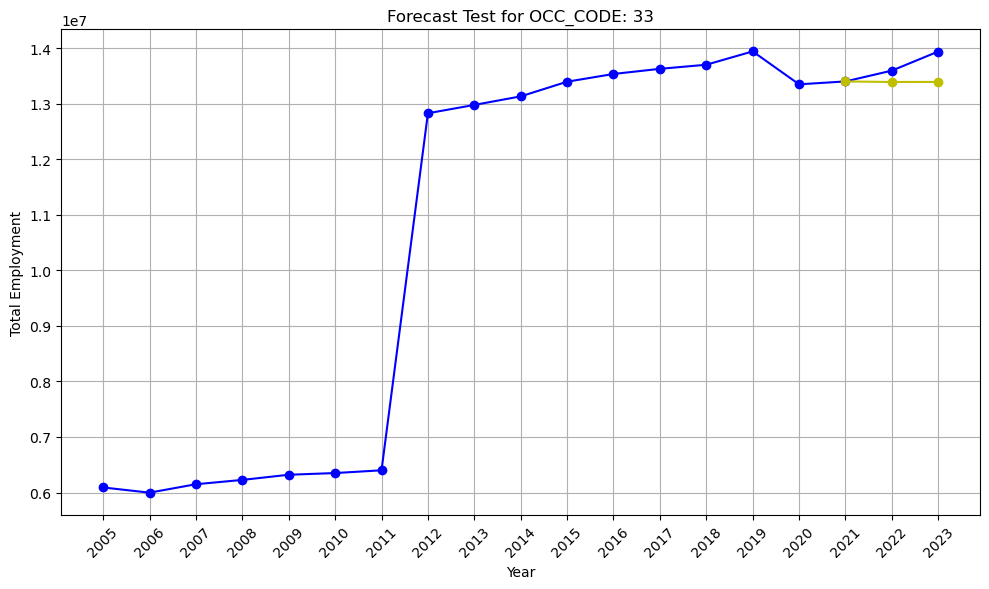

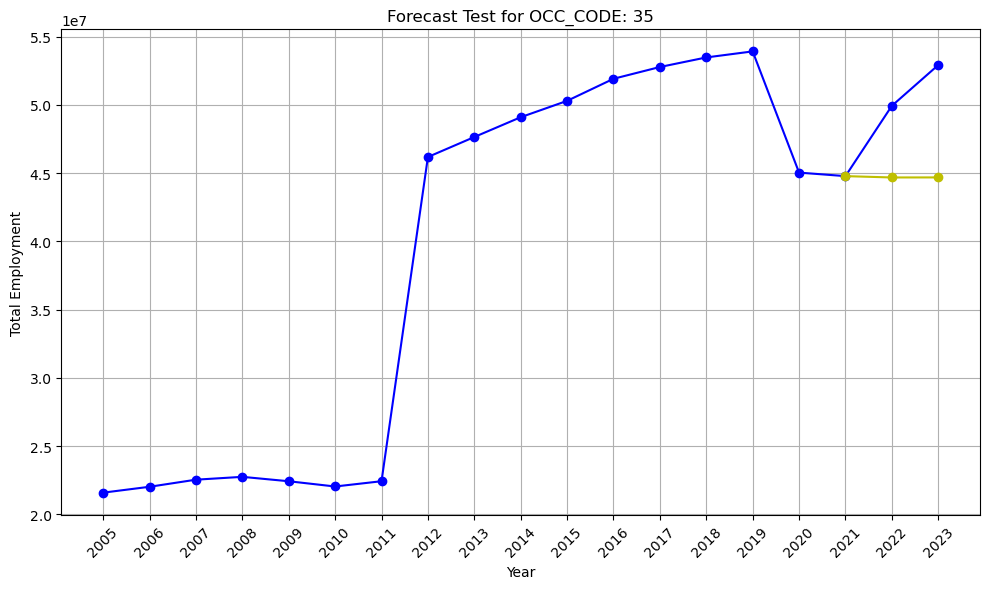

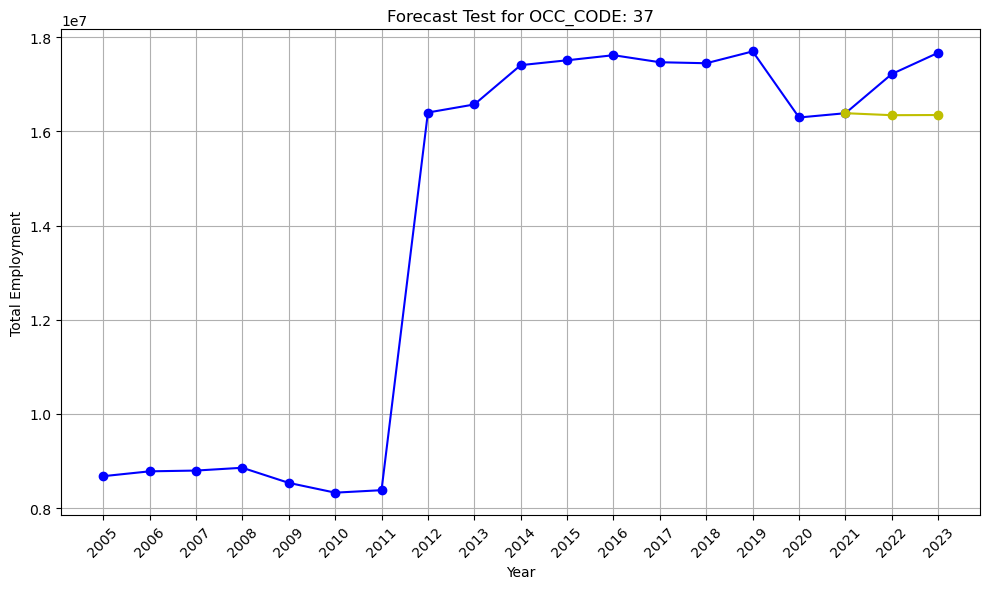

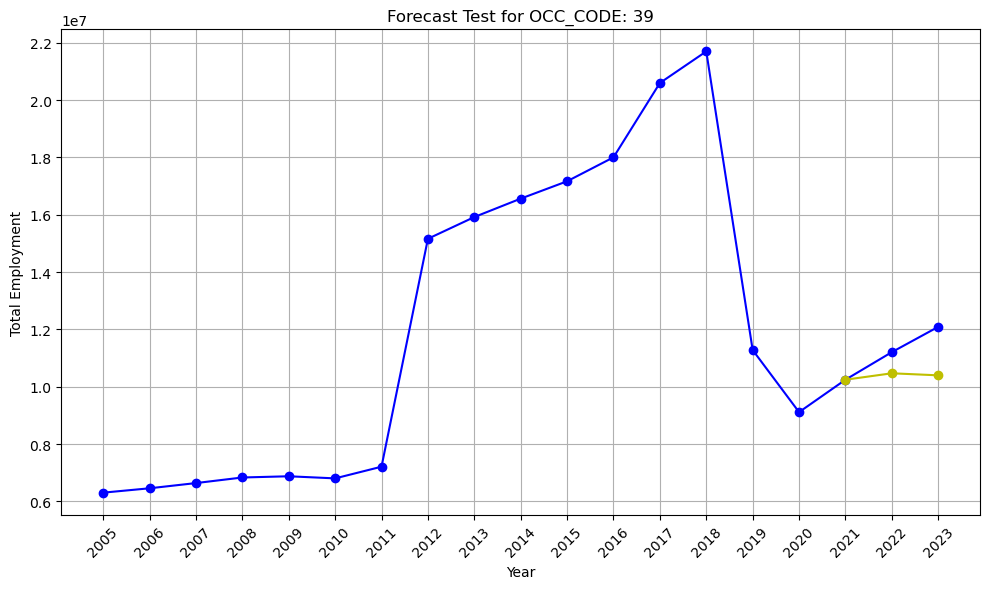

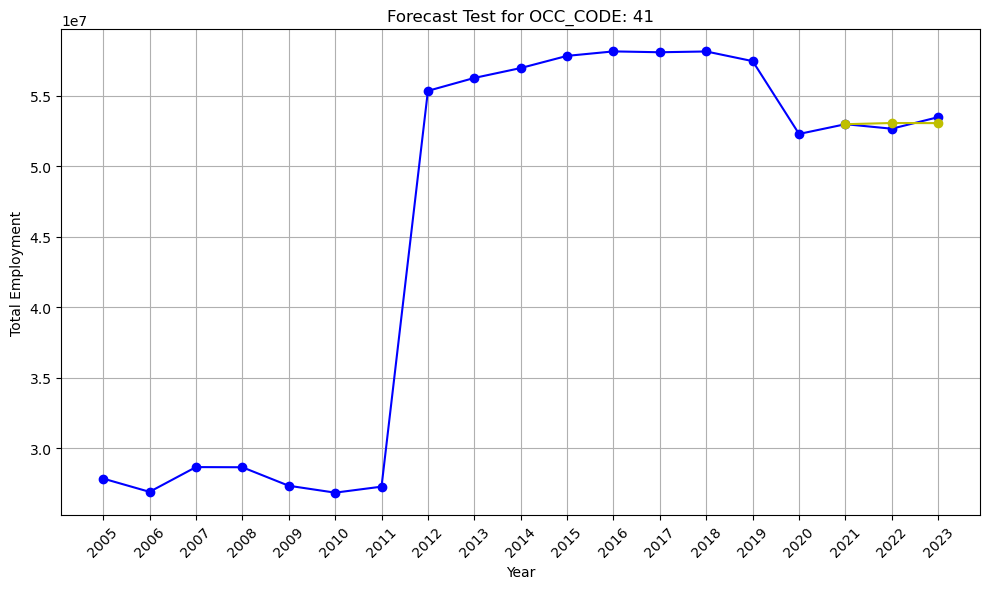

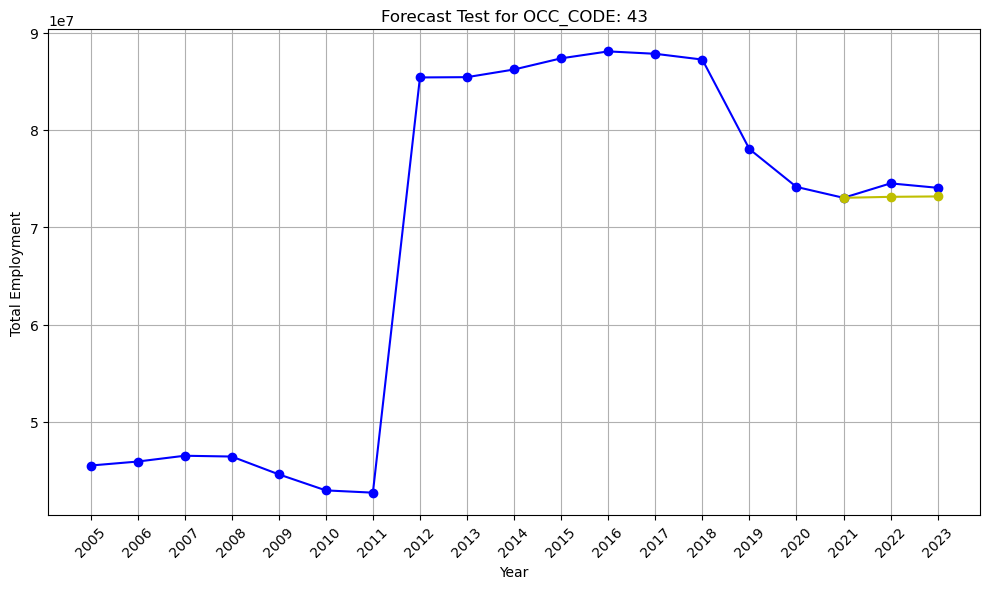

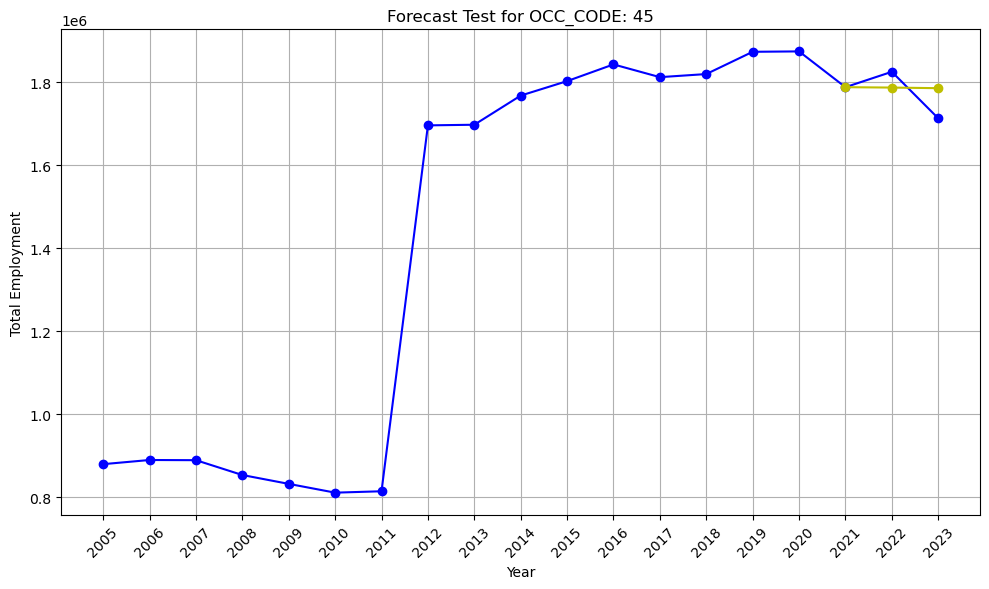

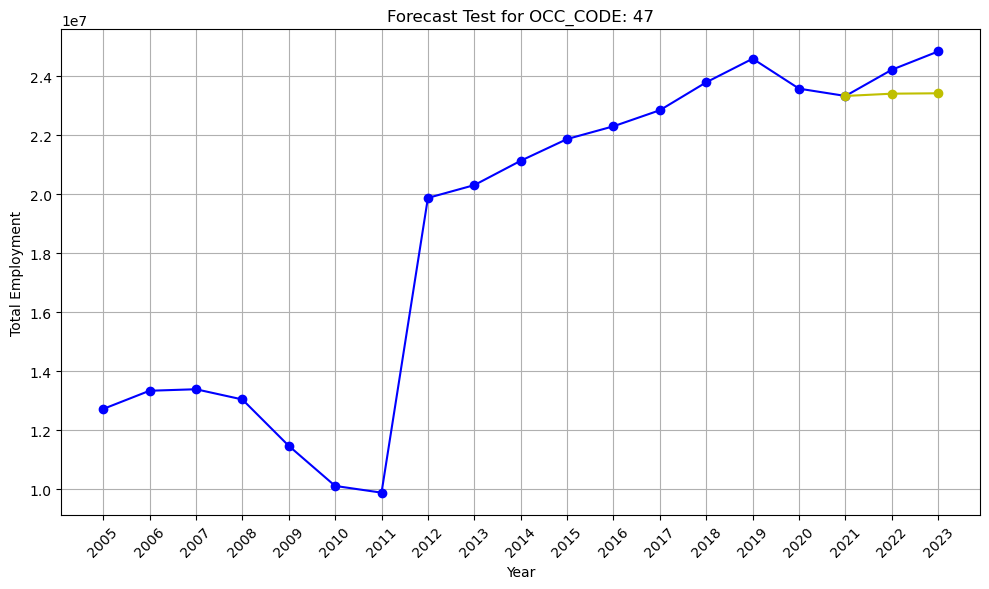

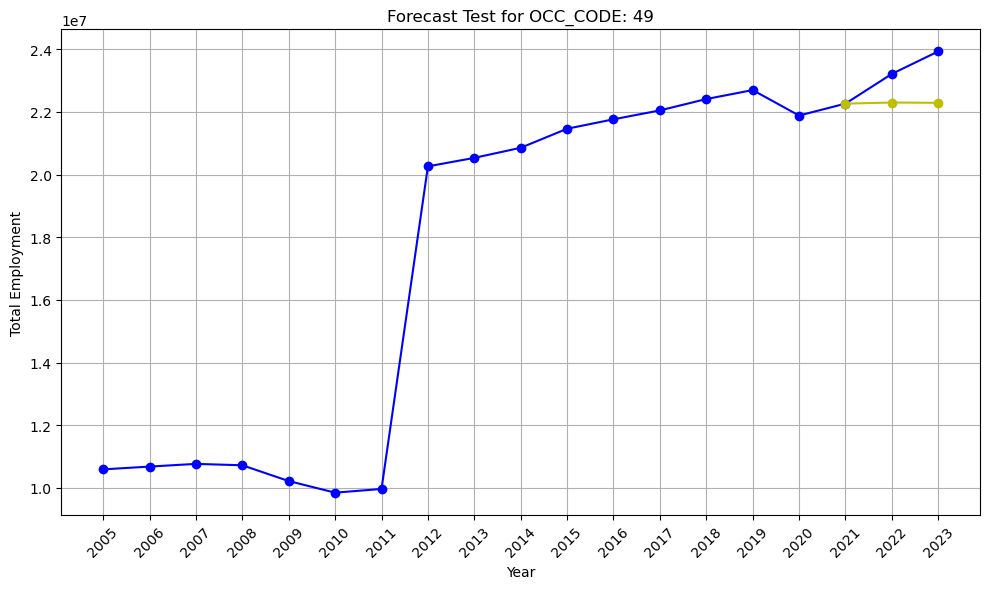

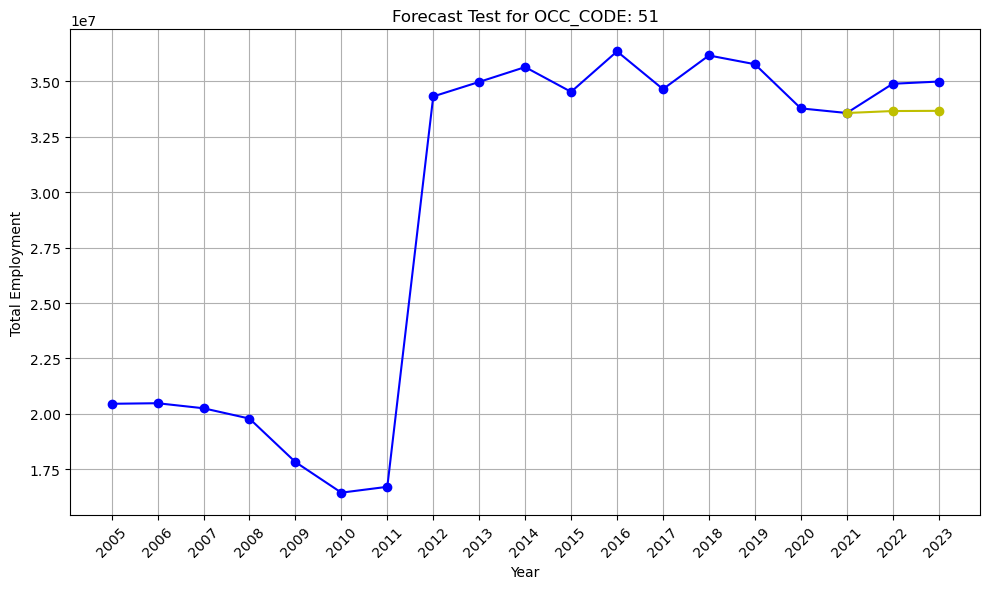

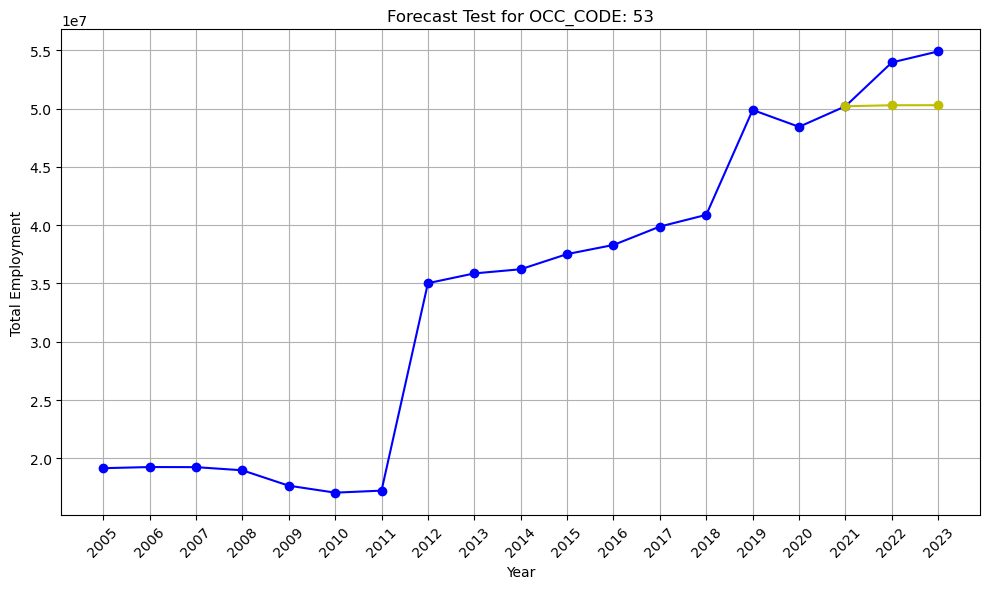

In [20]:
all_normalized_rmse_MA = []
all_r2_MA = []

for occ_code, group_df in timeseries_data.items():
    train = group_df["train"]
    test = group_df["test"]
    ts_full = pd.concat([train, test], ignore_index=False)
    forecast_test = MAmodels[occ_code].forecast(len(test))
    ts_full["Forecast_Manual"] = [None]*len(train) + list(forecast_test)
    ts_full.loc[EndYear, "Forecast_Manual"] = ts_full.loc[EndYear, "TOT_EMP"]
    ts_full_Exp = np.exp(ts_full)
    
    #Calculte RMSE
    all_normalized_rmse_MA.append(calculate_normalized_rmse(np.exp(test["TOT_EMP"]), np.exp(forecast_test)))
    all_r2_MA.append(calculate_r2(np.exp(test["TOT_EMP"]), np.exp(forecast_test)))
    
    plt.figure(figsize=(10, 6))  # Optional: Set the size of the plot
    plt.plot(ts_full_Exp["TOT_EMP"], marker='o', linestyle='-', color='b')  # Line plot with markers
    plt.plot(ts_full_Exp["Forecast_Manual"], marker='o', linestyle='-', color='y')  # Line plot with markers
    plt.title(f'Forecast Test for OCC_CODE: {occ_code}')  # Title of the plot
    plt.xlabel('Year')  # X-axis label
    plt.ylabel('Total Employment')  # Y-axis label
    plt.grid(True)  # Display gridlines
    plt.xticks(ts_full_Exp.index, rotation=45)  # Rotate x-axis labels for better readability (optional)
    plt.tight_layout()  # Ensure the plot fits into the figure area
    
avg_normalized_rmse_MA = sum(all_normalized_rmse_MA) / len(all_normalized_rmse_MA)
avg_r2_MA = sum(all_r2_MA) / len(all_r2_MA)

# Calculate Error

In [21]:
print(avg_normalized_rmse_AR)

0.06220003044519154


In [22]:
print(avg_normalized_rmse_MA)

0.06380403684109515


In [23]:
print(avg_r2_AR)

-44.7448206953719


In [24]:
print(avg_r2_MA)

-46.740188942311235
